In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import os
from config_images import *
import matplotlib.gridspec as gridspec

/home/rcarrasco/miniconda3/envs/my_python/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
#save_path = "/home/rodrigo/supernovae_detection/simulated_data/image_sequences/"
save_path = "/home/rcarrasco/simulated_data/image_sequences/ztf_positive_psf_ztf_positive_psf10"
f = h5py.File(save_path+".hdf5", "r")
fields = list(f.keys())
#stats = np.load("/home/toshiba/rodrigo/simulated_lightcurves/multiclass_SNLS_short20000.pkl")

In [3]:
list(f.keys()) # ['Field01', 'Field02', 'Field03', 'Field04' ...]
list(f["Field01"].keys())
"""['count_lightcurves',
 'galaxy_flag',
 'galaxy_image',
 'ids',
 'images',
 'labels',
 'lc_type',
 'lightcurves',
 'obs_cond',
 'psf_image']"""
data_keys = ['count_lightcurves',
 'galaxy_flag',
 'galaxy_image',
 'ids',
 'images',
 'labels',
 'lc_type',
 'lightcurves',
 'obs_cond',
 'psf_image']
list(f["Field01"]["images"].keys())

['g', 'r']

In [4]:
list(f["Field01"].keys())

['count_lightcurves',
 'estimated_counts',
 'estimated_error_counts',
 'galaxy_flag',
 'galaxy_image',
 'ids',
 'images',
 'labels',
 'lc_type',
 'lightcurves',
 'obs_cond',
 'psf_image']

In [4]:
def print_shape(f, data_keys, n_fields = 5, bands = ["g", "r"]):
    fields = list(f.keys())
    for field in fields[:n_fields]:
        print("Field", field)
        #data_keys = list(f[field].keys())
        for k in data_keys:
            for b in bands:
                print("key:",k," band:", b)
                if k not in ["galaxy_flag", "ids", "labels", "lc_type", "obs_cond"]:
                    print(f[field][k][b].shape)
                elif k == "obs_cond":
                    k_keys = list(f[field][k].keys())
                    for k_obs in k_keys:
                        if k_obs in ["filter", "limmag3"]:
                            continue
                        print("obs_cond", k_obs)
                        print(f[field][k][k_obs][b].shape)
                else:
                    print(f[field][k].shape)
print_shape(f, data_keys)

Field Field01
key: count_lightcurves  band: g
(60, 11)
key: count_lightcurves  band: r
(60, 12)
key: galaxy_flag  band: g
(60,)
key: galaxy_flag  band: r
(60,)
key: galaxy_image  band: g
(60, 21, 21, 11)
key: galaxy_image  band: r
(60, 21, 21, 12)
key: ids  band: g
(60,)
key: ids  band: r
(60,)
key: images  band: g
(60, 21, 21, 11)
key: images  band: r
(60, 21, 21, 12)
key: labels  band: g
(60,)
key: labels  band: r
(60,)
key: lc_type  band: g
(60,)
key: lc_type  band: r
(60,)
key: lightcurves  band: g
(60, 11)
key: lightcurves  band: r
(60, 12)
key: obs_cond  band: g
obs_cond airmass
(11,)
obs_cond epoch
(11,)
obs_cond exp_time
(11,)
obs_cond flux_conversion
(11,)
obs_cond good_quality_points
(11,)
obs_cond limmag5
(11,)
obs_cond obs_day
(11,)
obs_cond seeing
(11,)
obs_cond sky_brightness
(11,)
obs_cond zero_point
(11,)
key: obs_cond  band: r
obs_cond airmass
(12,)
obs_cond epoch
(12,)
obs_cond exp_time
(12,)
obs_cond flux_conversion
(12,)
obs_cond good_quality_points
(12,)
obs_cond l

['count_lightcurves', 'estimated_counts', 'estimated_error_counts', 'galaxy_flag', 'galaxy_image', 'ids', 'images', 'labels', 'lc_type', 'lightcurves', 'obs_cond', 'psf_image']
g: (60, 21, 21, 11) r: (60, 21, 21, 12)
g: (60, 11) r: (60, 12)
[223.29082 222.53024 223.64407 223.62057 223.78067 223.6941  223.68848
 223.65738 223.6724  223.79594 223.81113 223.73146]


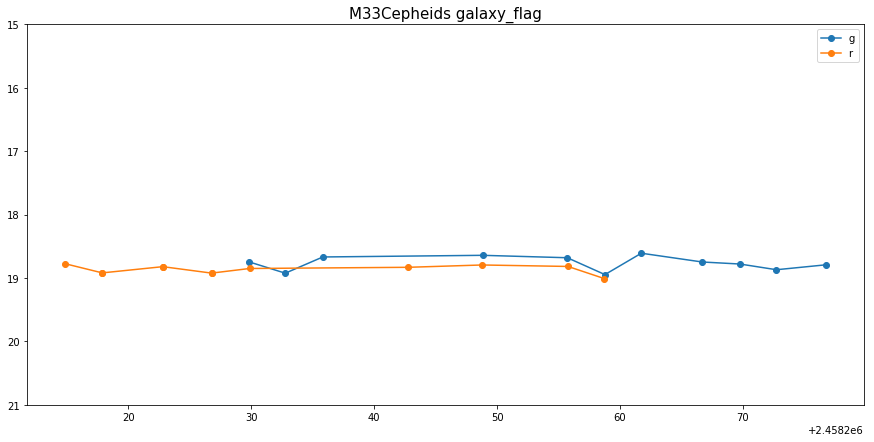

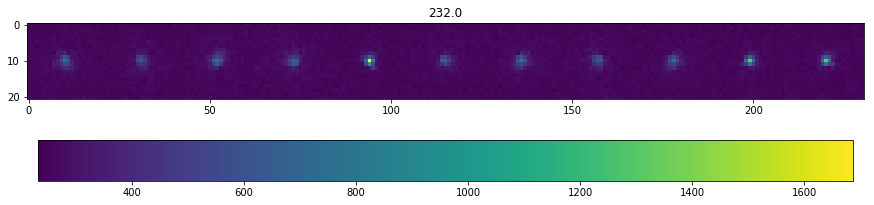

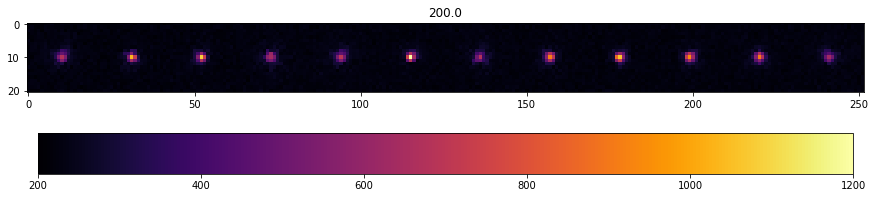

['count_lightcurves', 'estimated_counts', 'estimated_error_counts', 'galaxy_flag', 'galaxy_image', 'ids', 'images', 'labels', 'lc_type', 'lightcurves', 'obs_cond', 'psf_image']
g: (60, 21, 21, 16) r: (60, 21, 21, 4)
g: (60, 16) r: (60, 4)
[160.83905 161.05363 160.90533 187.17427]


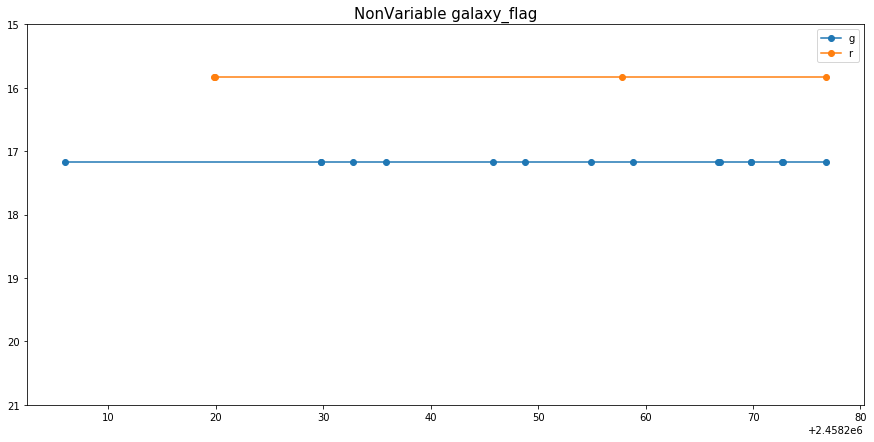

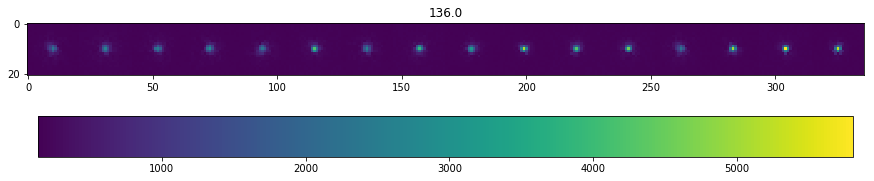

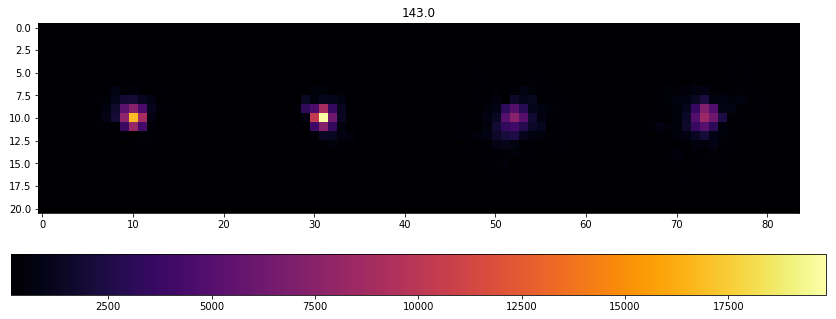

['count_lightcurves', 'estimated_counts', 'estimated_error_counts', 'galaxy_flag', 'galaxy_image', 'ids', 'images', 'labels', 'lc_type', 'lightcurves', 'obs_cond', 'psf_image']
g: (60, 21, 21, 17) r: (60, 21, 21, 19)
g: (60, 17) r: (60, 19)
[236.8753  237.78432 237.83475 237.76324 237.73877 237.99245 237.82133
 237.88097 238.21817 237.98808 236.98917 237.92802 237.56378 237.77472
 237.44331 237.66829 237.59254 237.66113 237.63246]


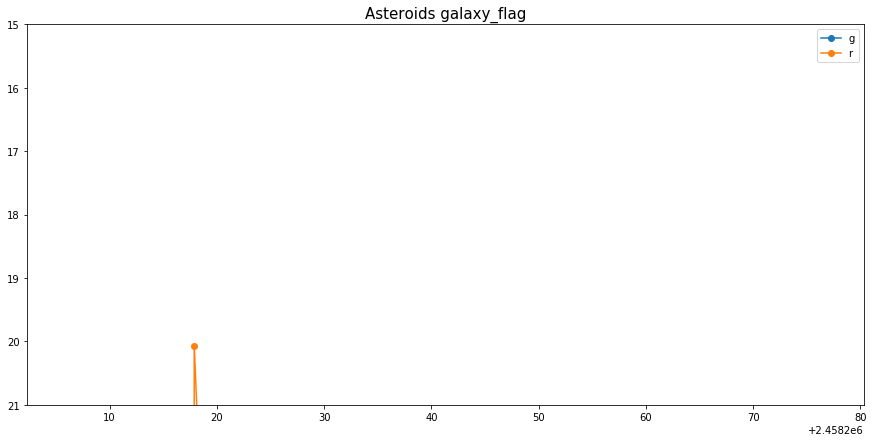

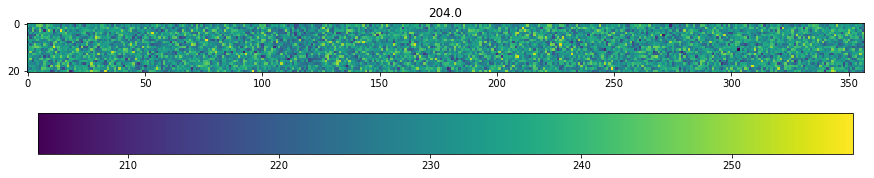

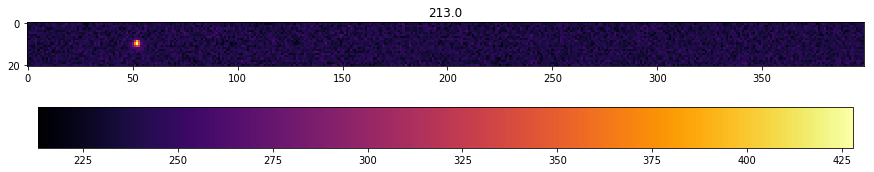

['count_lightcurves', 'estimated_counts', 'estimated_error_counts', 'galaxy_flag', 'galaxy_image', 'ids', 'images', 'labels', 'lc_type', 'lightcurves', 'obs_cond', 'psf_image']
g: (60, 21, 21, 5) r: (60, 21, 21, 25)
g: (60, 5) r: (60, 25)
[238.40395 241.09995 241.03767 241.30412 241.16982 238.2321  238.26552
 241.19563 238.18083 238.39447 241.04152 238.26196 240.89421 241.19891
 238.39392 238.48965 241.16814 238.21062 237.67207 240.50072 241.04253
 238.24062 241.33228 238.32826 238.37617]


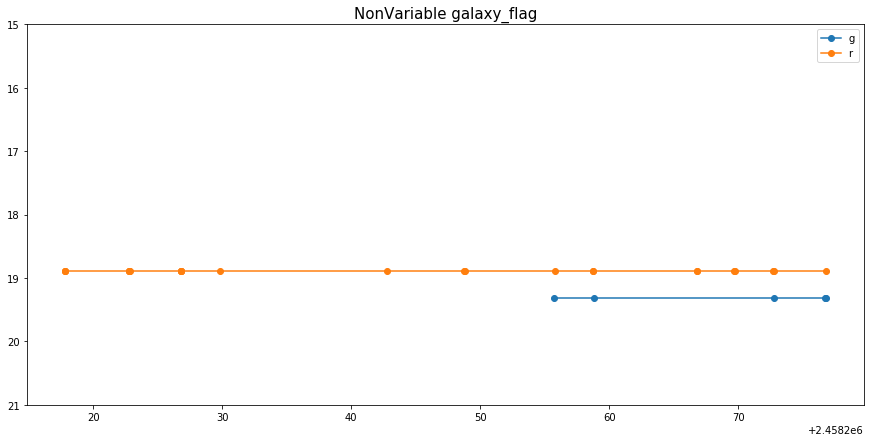

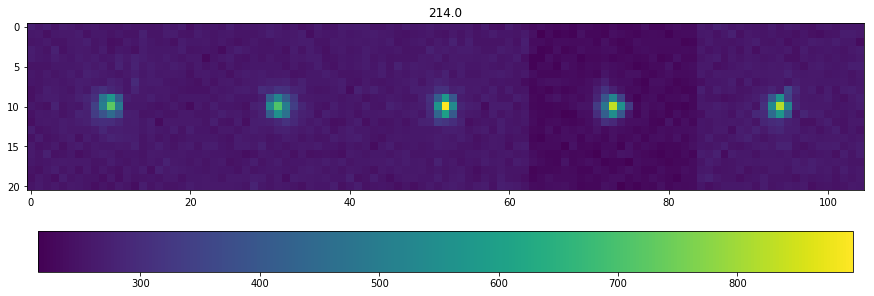

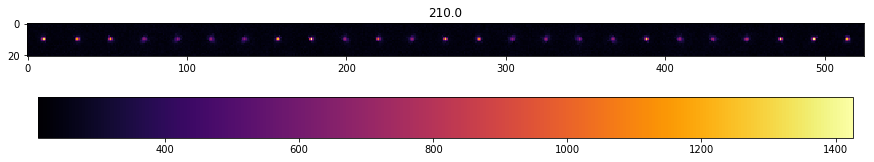

['count_lightcurves', 'estimated_counts', 'estimated_error_counts', 'galaxy_flag', 'galaxy_image', 'ids', 'images', 'labels', 'lc_type', 'lightcurves', 'obs_cond', 'psf_image']
g: (60, 21, 21, 19) r: (60, 21, 21, 10)
g: (60, 19) r: (60, 10)
[178.13206 181.27934 178.0662  178.08684 181.418   177.54399 180.75961
 177.77971 181.03392 178.03339]


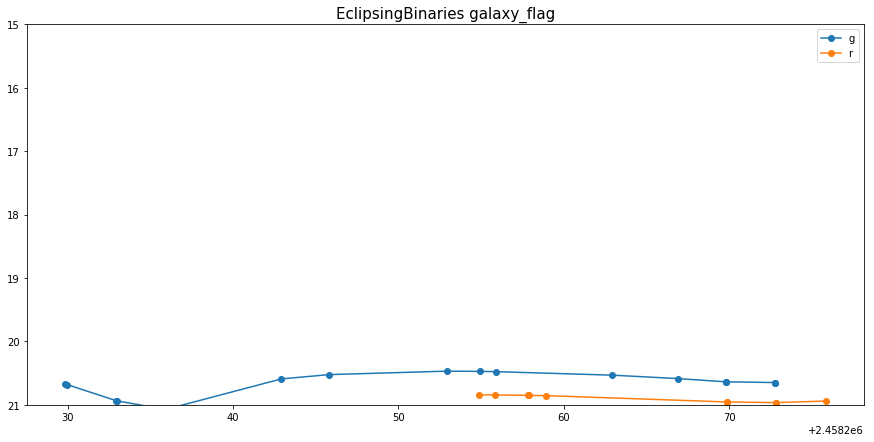

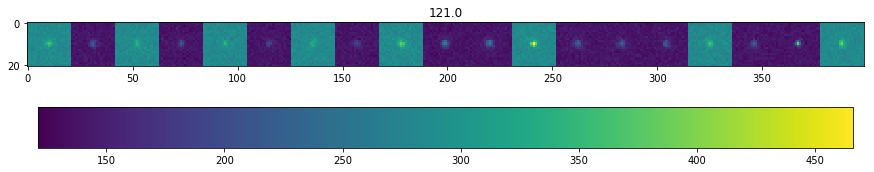

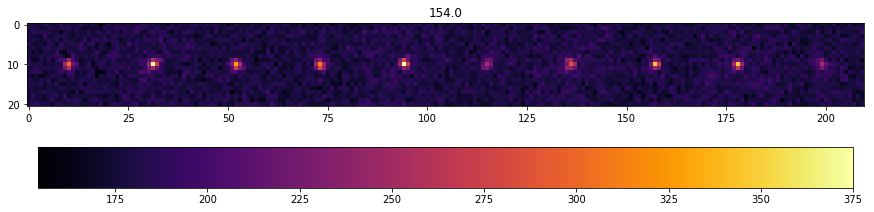

['count_lightcurves', 'estimated_counts', 'estimated_error_counts', 'galaxy_flag', 'galaxy_image', 'ids', 'images', 'labels', 'lc_type', 'lightcurves', 'obs_cond', 'psf_image']
g: (60, 21, 21, 105) r: (60, 21, 21, 14)
g: (60, 105) r: (60, 14)
[292.50537 275.12805 275.12613 275.97244 171.21205 170.71794 170.93166
 171.09924 171.36568 276.1215  171.26653 169.43843 275.80444 170.87181]


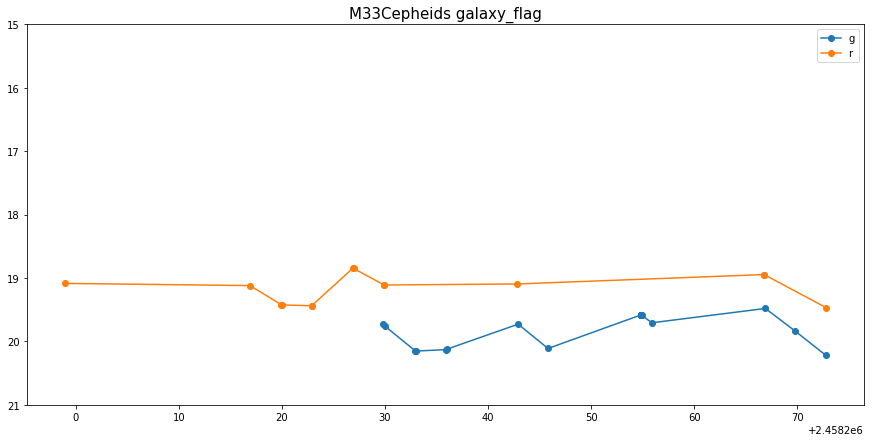

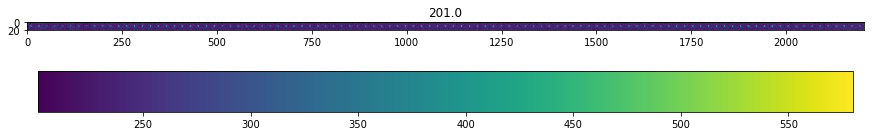

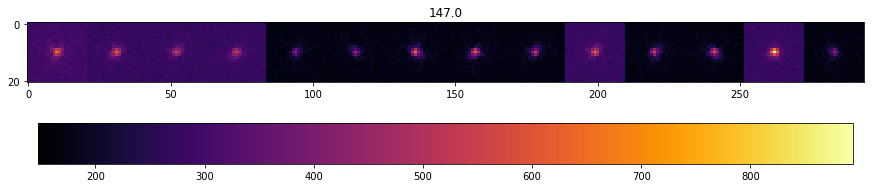

['count_lightcurves', 'estimated_counts', 'estimated_error_counts', 'galaxy_flag', 'galaxy_image', 'ids', 'images', 'labels', 'lc_type', 'lightcurves', 'obs_cond', 'psf_image']
g: (60, 21, 21, 91) r: (60, 21, 21, 8)
g: (60, 91) r: (60, 8)
[170.49988 171.22375 170.49419 171.60219 170.4996  171.67415 170.45094
 171.46553]


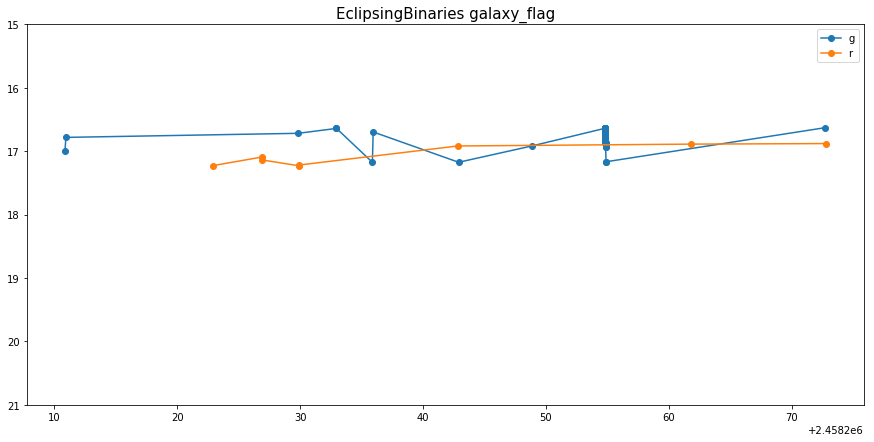

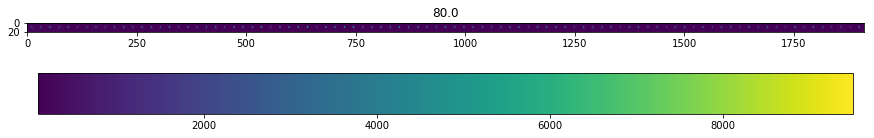

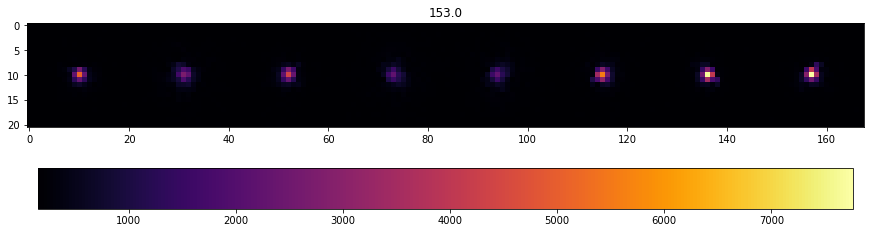

['count_lightcurves', 'estimated_counts', 'estimated_error_counts', 'galaxy_flag', 'galaxy_image', 'ids', 'images', 'labels', 'lc_type', 'lightcurves', 'obs_cond', 'psf_image']
g: (60, 21, 21, 11) r: (60, 21, 21, 20)
g: (60, 11) r: (60, 20)
[215.59013 213.5351  216.80724 213.803   214.68864 216.69653 213.0752
 213.69807 214.47964 213.71774 217.21391 212.95915 213.0352  212.78474
 212.96625 213.75558 215.06757 214.28317 213.68771 213.0656 ]


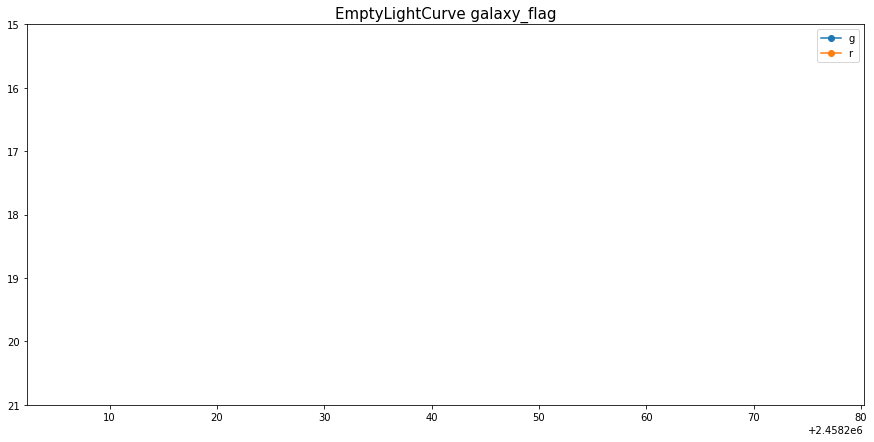

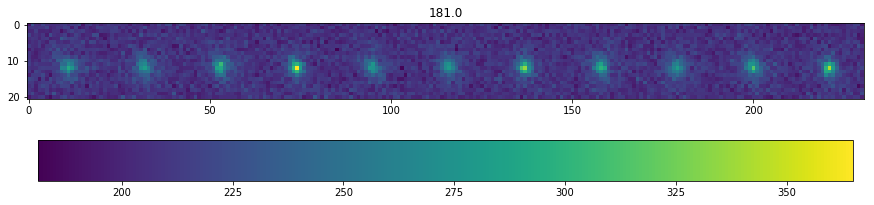

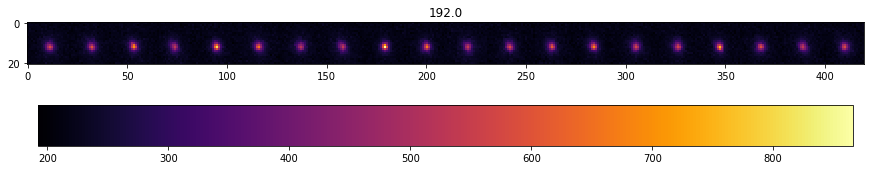

['count_lightcurves', 'estimated_counts', 'estimated_error_counts', 'galaxy_flag', 'galaxy_image', 'ids', 'images', 'labels', 'lc_type', 'lightcurves', 'obs_cond', 'psf_image']
g: (60, 21, 21, 13) r: (60, 21, 21, 11)
g: (60, 13) r: (60, 11)
[171.51163 171.71243 171.69823 171.52438 171.49094 171.71149 171.67332
 171.18375 171.1079  171.24095 171.54317]


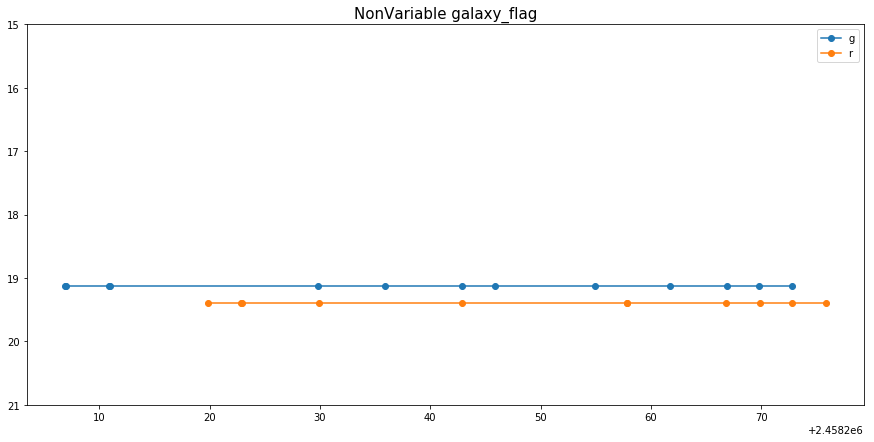

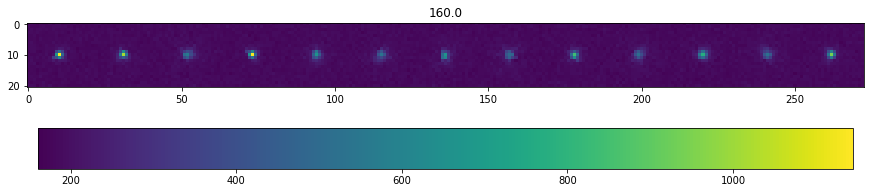

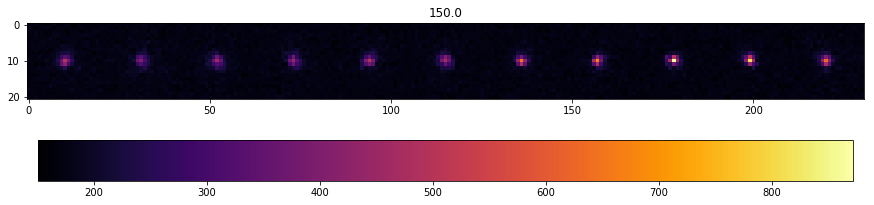

['count_lightcurves', 'estimated_counts', 'estimated_error_counts', 'galaxy_flag', 'galaxy_image', 'ids', 'images', 'labels', 'lc_type', 'lightcurves', 'obs_cond', 'psf_image']
g: (60, 21, 21, 20) r: (60, 21, 21, 14)
g: (60, 20) r: (60, 14)
[175.20972 161.13667 161.1323  175.2914  175.20363 175.0104  175.17175
 175.1675  175.17981 175.317   175.11809 175.05933 175.25165 175.65176]


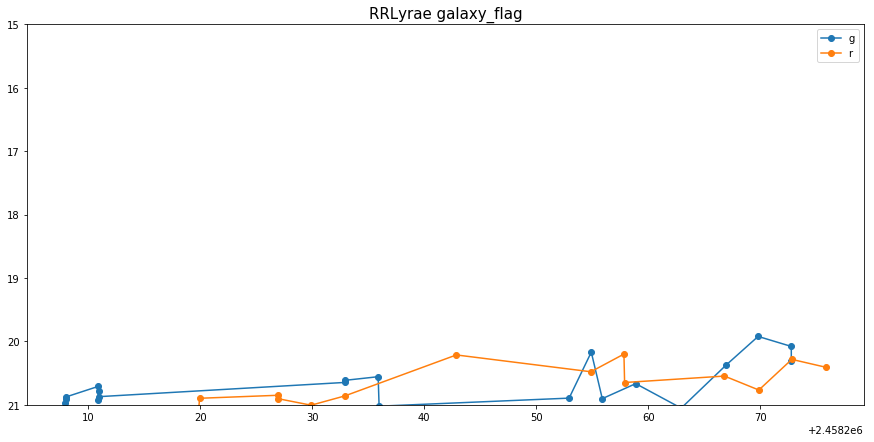

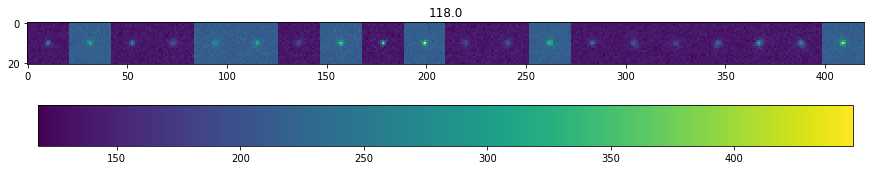

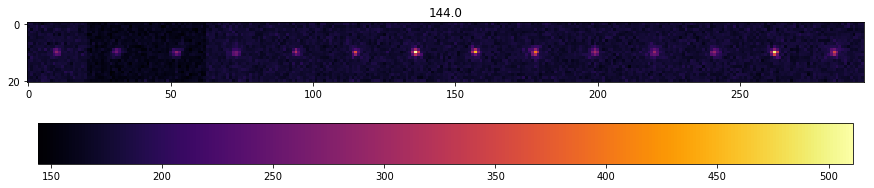

['count_lightcurves', 'estimated_counts', 'estimated_error_counts', 'galaxy_flag', 'galaxy_image', 'ids', 'images', 'labels', 'lc_type', 'lightcurves', 'obs_cond', 'psf_image']
g: (60, 21, 21, 13) r: (60, 21, 21, 7)
g: (60, 13) r: (60, 7)
[186.07216 185.86557 185.8169  185.92093 186.08856 186.06924 185.5621 ]


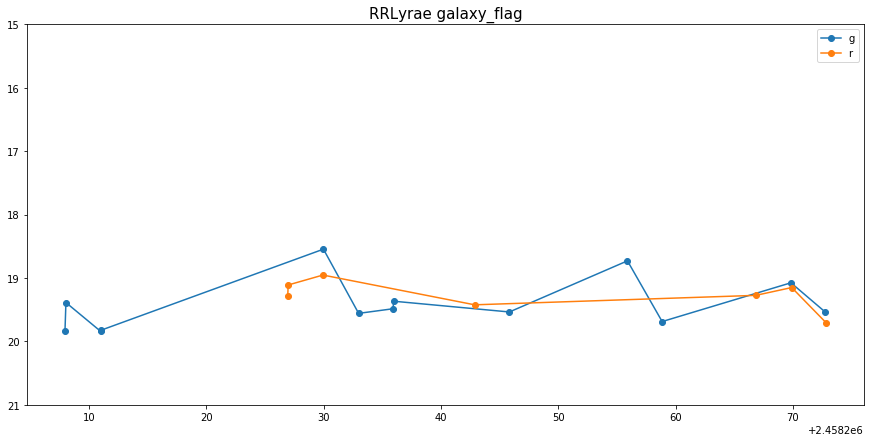

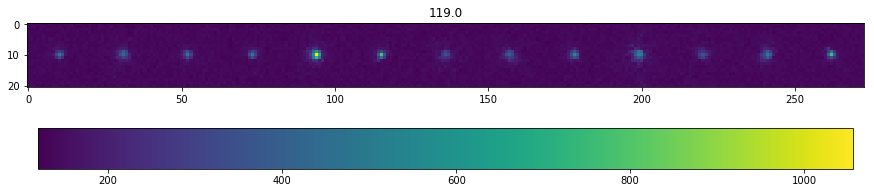

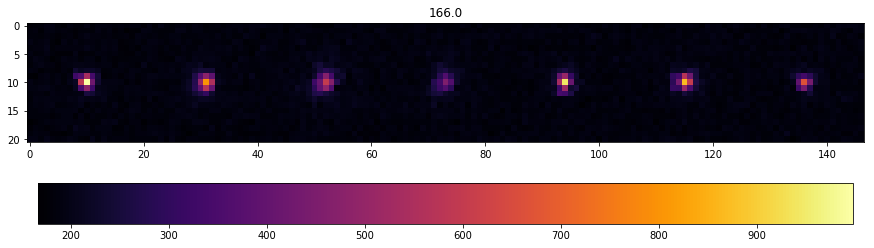

['count_lightcurves', 'estimated_counts', 'estimated_error_counts', 'galaxy_flag', 'galaxy_image', 'ids', 'images', 'labels', 'lc_type', 'lightcurves', 'obs_cond', 'psf_image']
g: (60, 21, 21, 19) r: (60, 21, 21, 22)
g: (60, 19) r: (60, 22)
[228.1752  264.81873 264.79416 228.78894 264.8034  228.57896 264.72162
 228.44156 264.7922  264.7284  264.79123 228.27905 229.19078 228.50258
 264.86108 228.30576 264.87378 230.43776 265.92163 229.20326 228.84172
 264.84833]


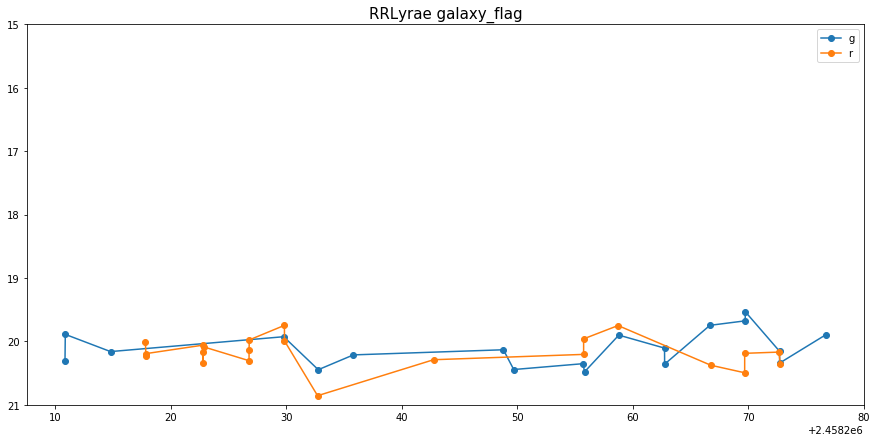

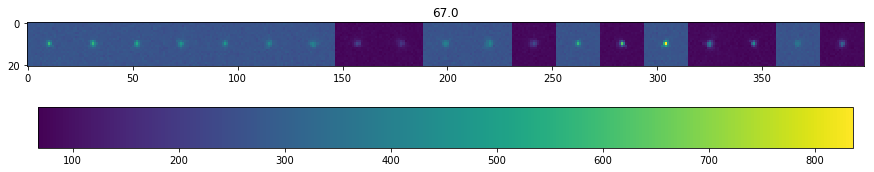

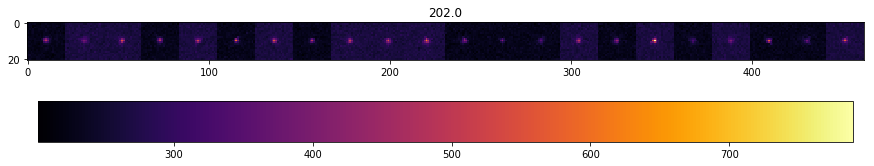

['count_lightcurves', 'estimated_counts', 'estimated_error_counts', 'galaxy_flag', 'galaxy_image', 'ids', 'images', 'labels', 'lc_type', 'lightcurves', 'obs_cond', 'psf_image']
g: (60, 21, 21, 7) r: (60, 21, 21, 16)
g: (60, 7) r: (60, 16)
[239.39262 236.88585 238.47244 240.06488 240.19101 238.22183 240.15776
 238.511   239.83385 238.34381 240.24292 238.4832  240.1553  238.58054
 240.28662 238.01878]


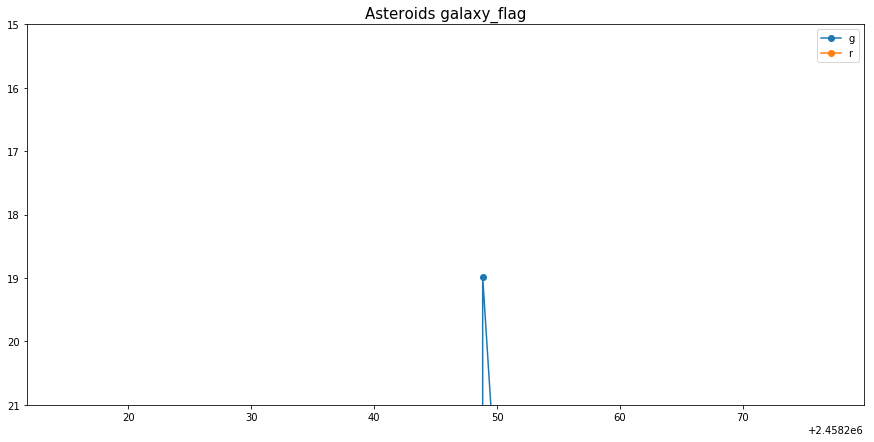

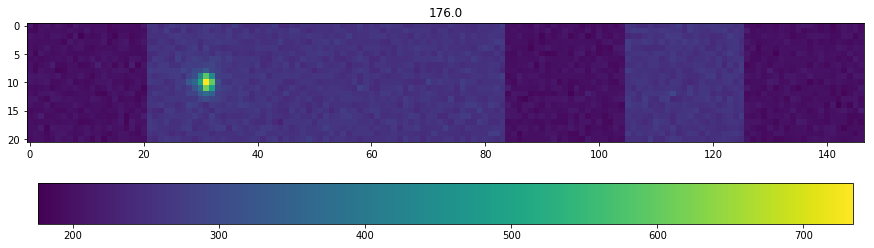

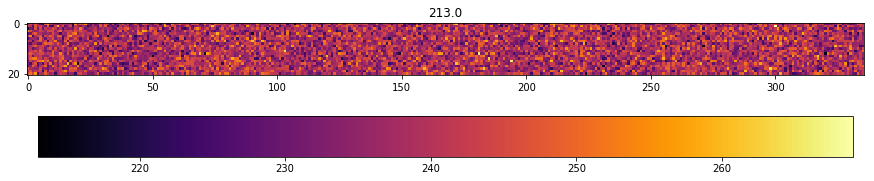

['count_lightcurves', 'estimated_counts', 'estimated_error_counts', 'galaxy_flag', 'galaxy_image', 'ids', 'images', 'labels', 'lc_type', 'lightcurves', 'obs_cond', 'psf_image']
g: (60, 21, 21, 3) r: (60, 21, 21, 17)
g: (60, 3) r: (60, 17)
[221.75436 221.5311  222.00443 221.90025 221.44547 221.61491 221.28651
 221.39468 221.655   221.37875 221.59676 221.33673 221.45322 221.53261
 221.6546  221.56358 221.59004]


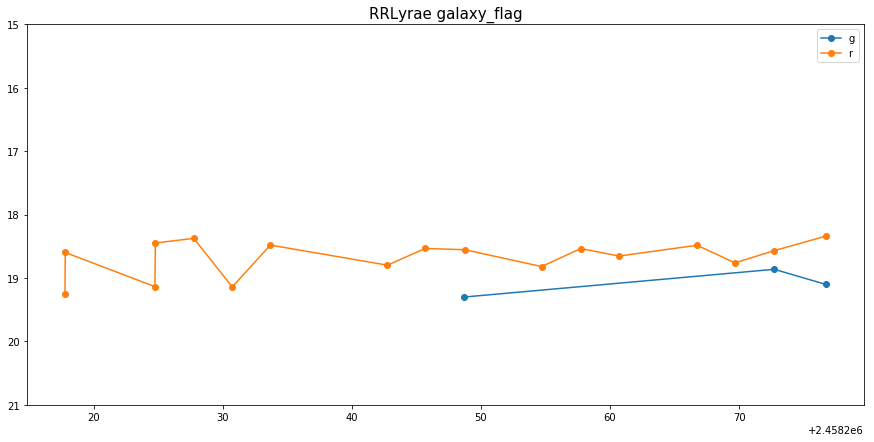

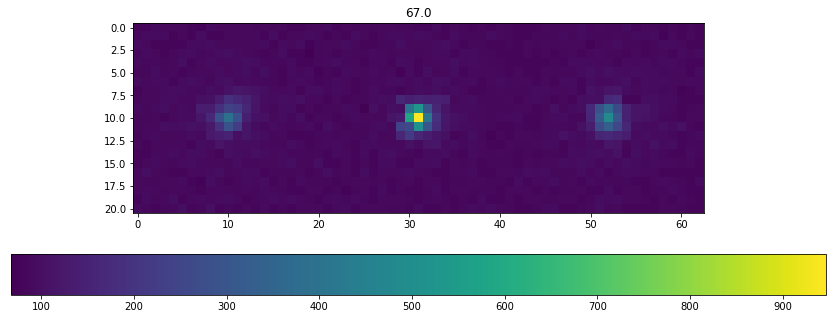

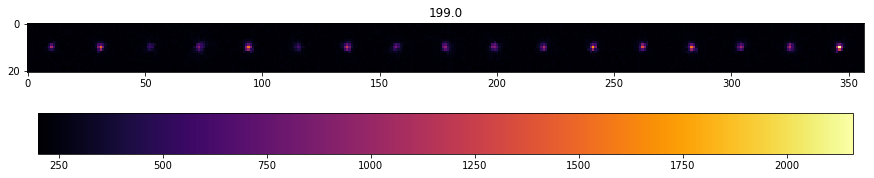

['count_lightcurves', 'estimated_counts', 'estimated_error_counts', 'galaxy_flag', 'galaxy_image', 'ids', 'images', 'labels', 'lc_type', 'lightcurves', 'obs_cond', 'psf_image']
g: (60, 21, 21, 5) r: (60, 21, 21, 15)
g: (60, 5) r: (60, 15)
[275.50308 275.93735 275.6344  273.20685 274.74802 264.29886 275.1603
 275.77252 274.94037 275.49817 275.82584 275.6614  275.3655  275.715
 275.98572]


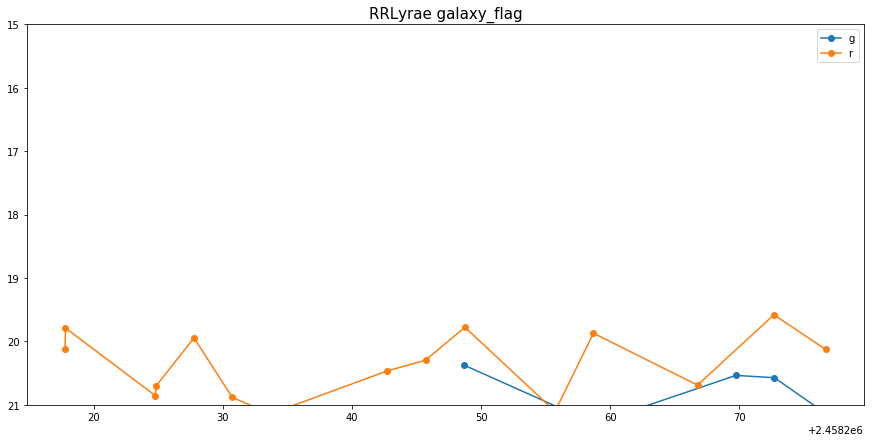

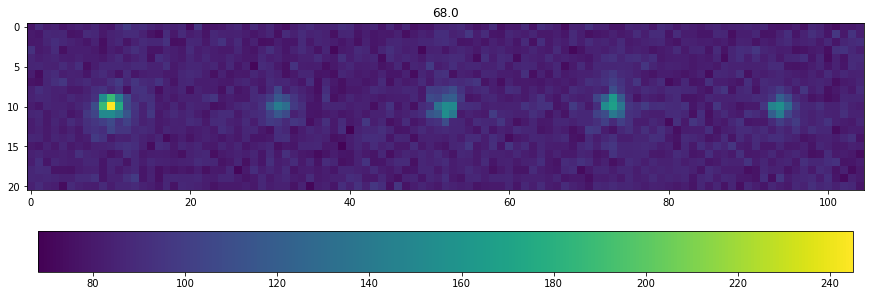

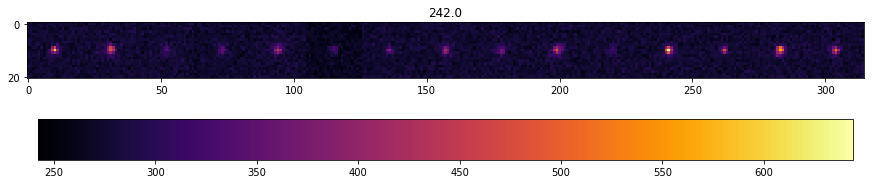

['count_lightcurves', 'estimated_counts', 'estimated_error_counts', 'galaxy_flag', 'galaxy_image', 'ids', 'images', 'labels', 'lc_type', 'lightcurves', 'obs_cond', 'psf_image']
g: (60, 21, 21, 59) r: (60, 21, 21, 7)
g: (60, 59) r: (60, 7)
[174.82054 175.01468 173.07593 173.41646 174.93889 175.28226 173.20027]


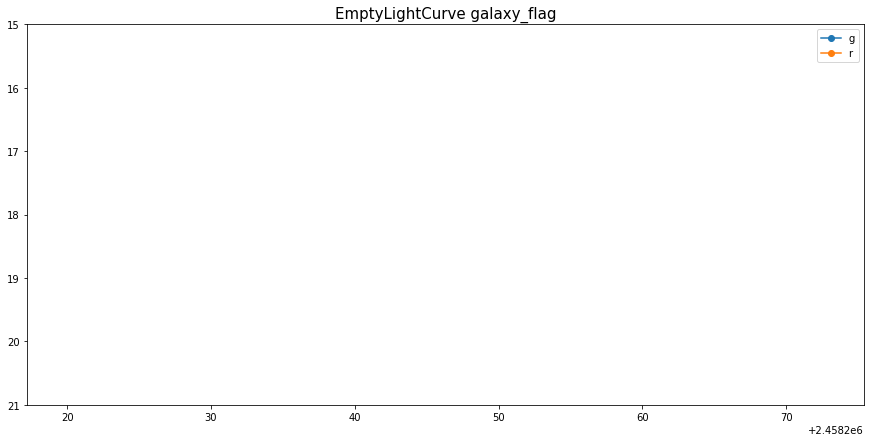

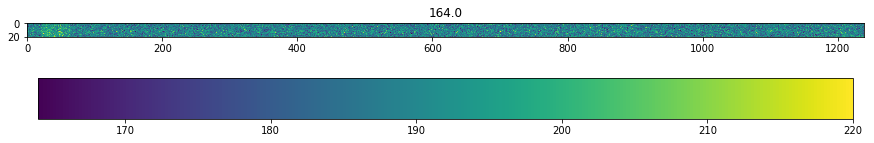

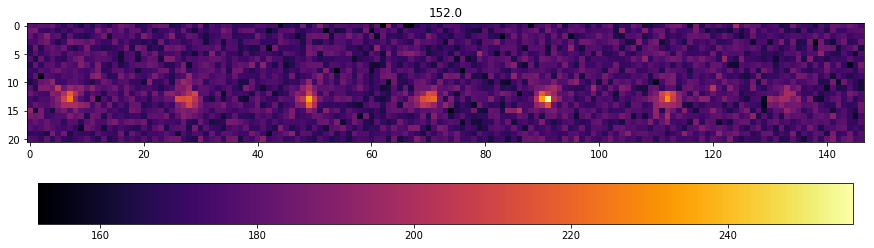

['count_lightcurves', 'estimated_counts', 'estimated_error_counts', 'galaxy_flag', 'galaxy_image', 'ids', 'images', 'labels', 'lc_type', 'lightcurves', 'obs_cond', 'psf_image']
g: (60, 21, 21, 19) r: (60, 21, 21, 1)
g: (60, 19) r: (60, 1)
[263.20258]


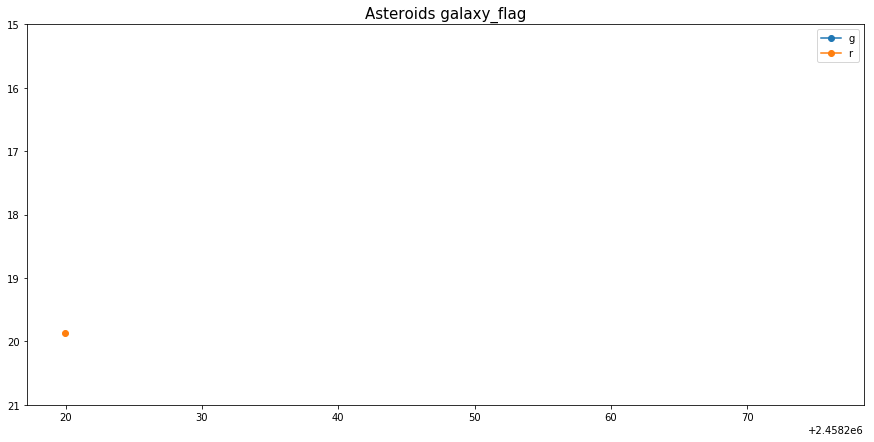

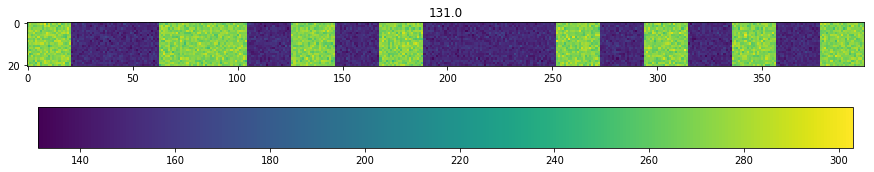

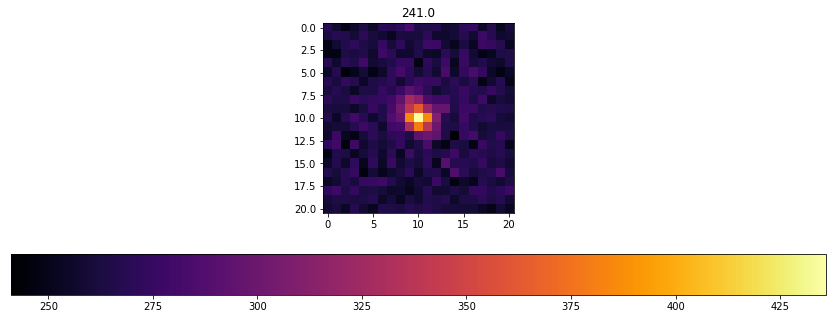

['count_lightcurves', 'estimated_counts', 'estimated_error_counts', 'galaxy_flag', 'galaxy_image', 'ids', 'images', 'labels', 'lc_type', 'lightcurves', 'obs_cond', 'psf_image']
g: (60, 21, 21, 15) r: (60, 21, 21, 9)
g: (60, 15) r: (60, 9)
[216.45549 230.38727 216.38994 230.58792 229.54367 229.8385  215.59769
 230.0752  216.24626]


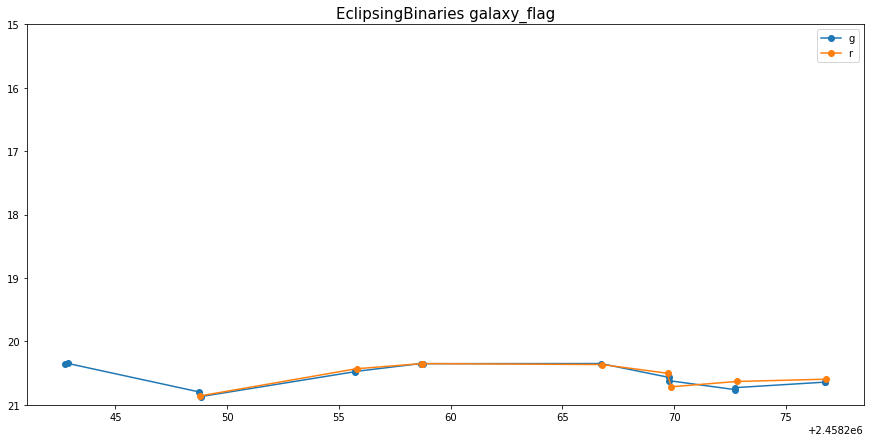

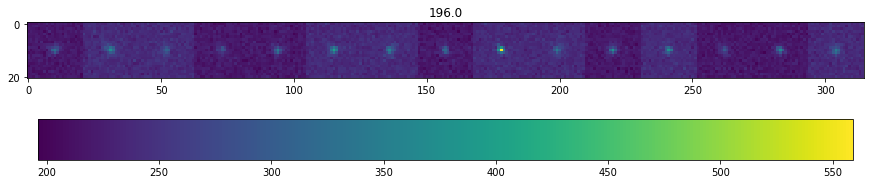

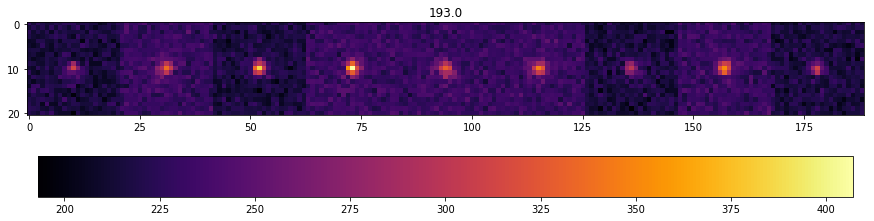

['count_lightcurves', 'estimated_counts', 'estimated_error_counts', 'galaxy_flag', 'galaxy_image', 'ids', 'images', 'labels', 'lc_type', 'lightcurves', 'obs_cond', 'psf_image']
g: (60, 21, 21, 14) r: (60, 21, 21, 16)
g: (60, 14) r: (60, 16)
[178.50563 220.0772  178.57423 178.87852 220.08238 178.9041  178.77821
 219.95164 178.61523 219.62578 178.44273 178.67299 178.56978 178.85117
 220.0379  219.68211]


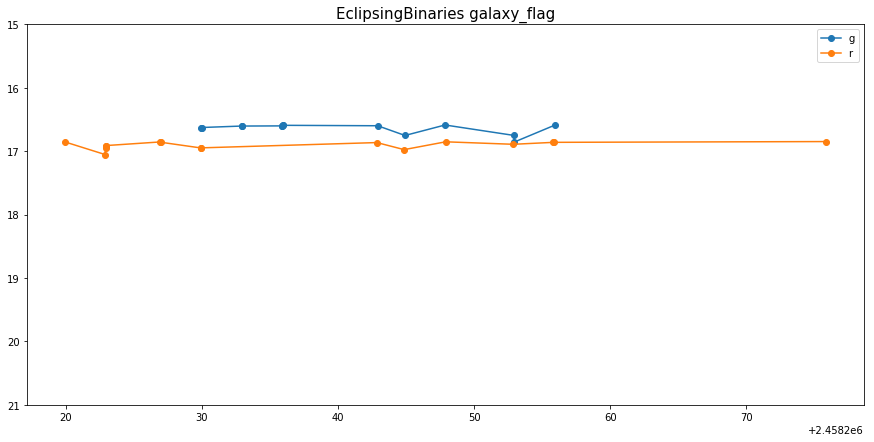

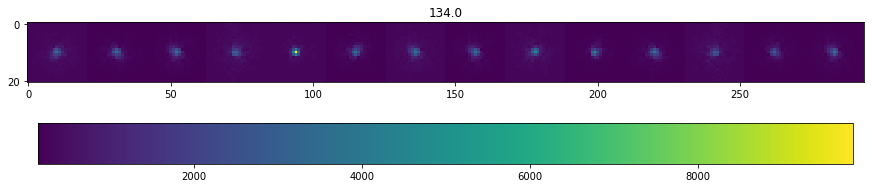

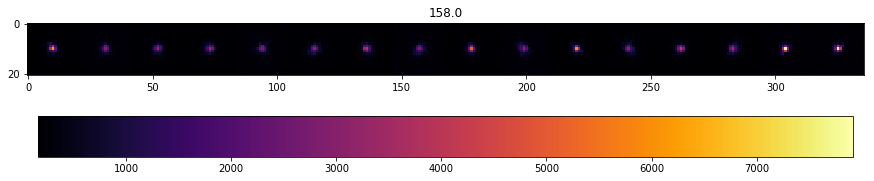

['count_lightcurves', 'estimated_counts', 'estimated_error_counts', 'galaxy_flag', 'galaxy_image', 'ids', 'images', 'labels', 'lc_type', 'lightcurves', 'obs_cond', 'psf_image']
g: (60, 21, 21, 21) r: (60, 21, 21, 15)
g: (60, 21) r: (60, 15)
[166.18913 165.89172 165.96735 179.64674 166.14053 179.41672 166.45381
 179.60919 166.15494 165.11382 163.92667 179.79274 179.73676 165.52748
 165.66673]


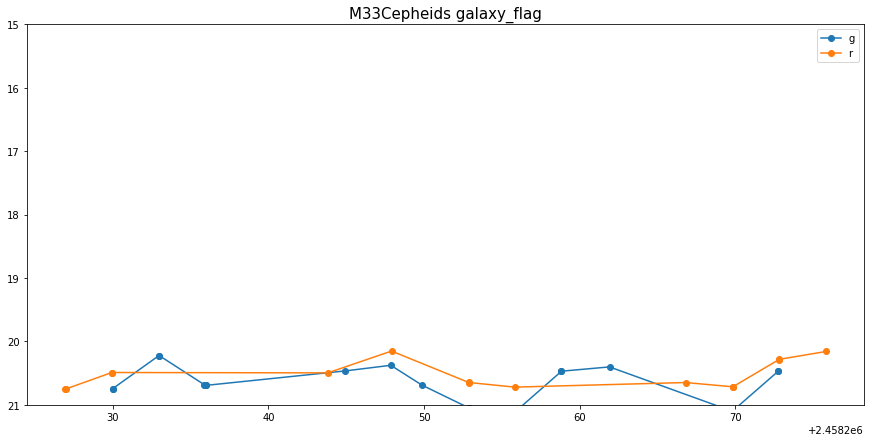

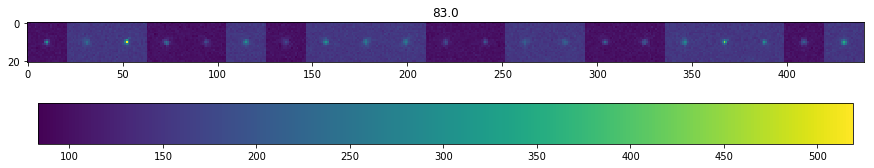

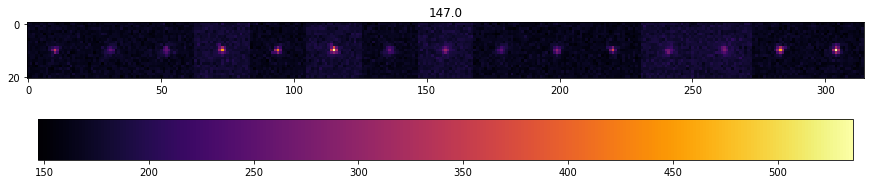

['count_lightcurves', 'estimated_counts', 'estimated_error_counts', 'galaxy_flag', 'galaxy_image', 'ids', 'images', 'labels', 'lc_type', 'lightcurves', 'obs_cond', 'psf_image']
g: (60, 21, 21, 11) r: (60, 21, 21, 13)
g: (60, 11) r: (60, 13)
[224.19814 224.06923 224.191   224.14847 166.25615 224.25273 224.41464
 166.40825 224.41467 165.75871 166.18375 223.97679 224.35349]


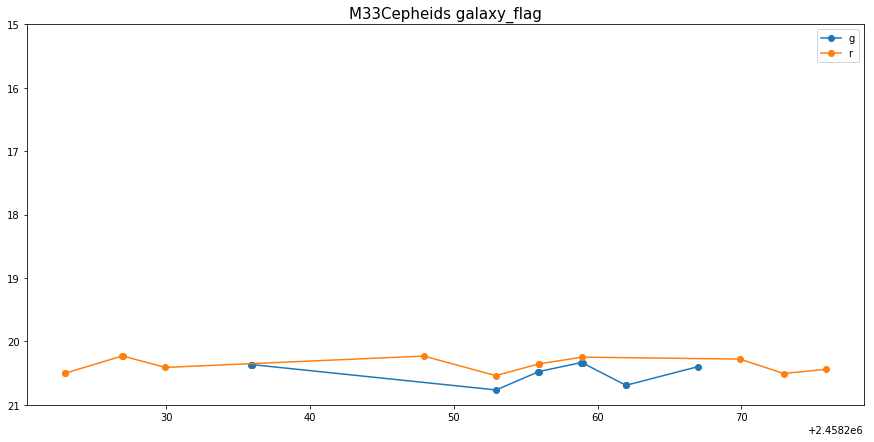

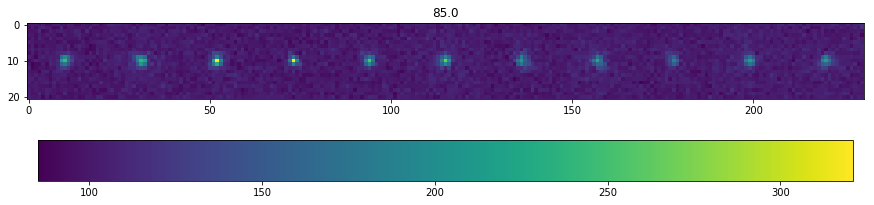

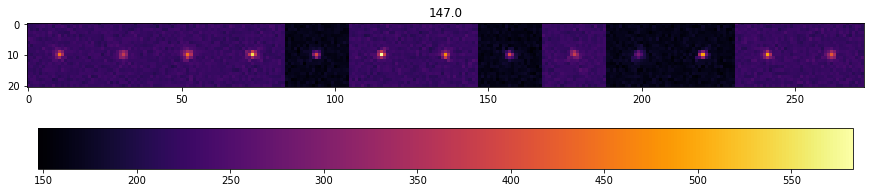

['count_lightcurves', 'estimated_counts', 'estimated_error_counts', 'galaxy_flag', 'galaxy_image', 'ids', 'images', 'labels', 'lc_type', 'lightcurves', 'obs_cond', 'psf_image']
g: (60, 21, 21, 28) r: (60, 21, 21, 14)
g: (60, 28) r: (60, 14)
[166.94434 168.79381 168.76418 166.88527 166.80072 166.98665 168.51732
 168.31505 166.9571  168.57089 167.17688 166.71762 166.77196 166.53914]


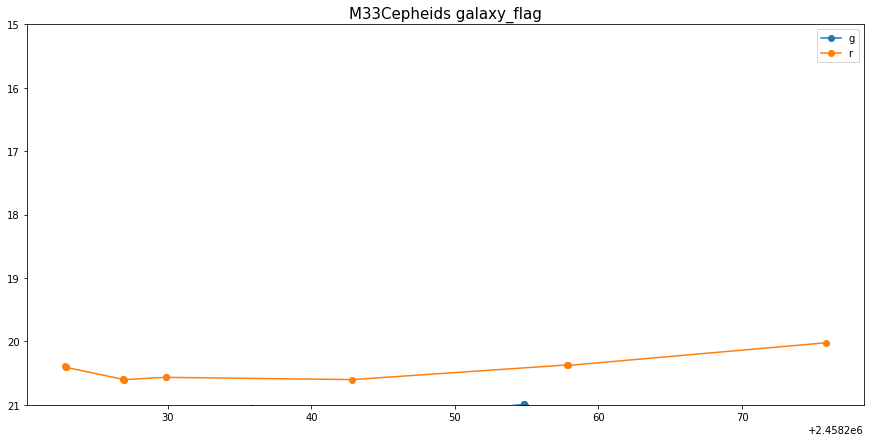

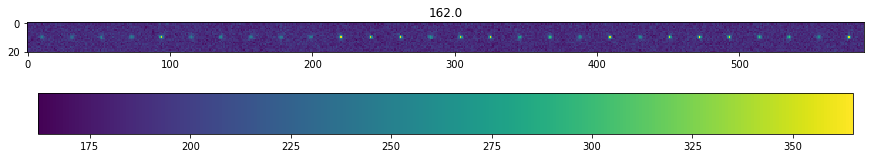

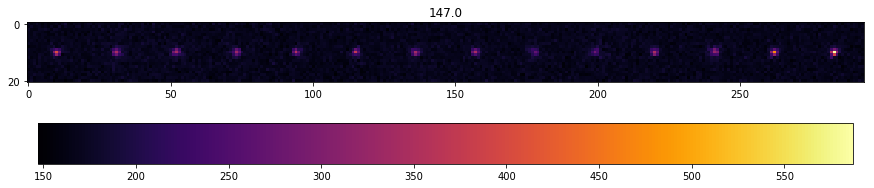

['count_lightcurves', 'estimated_counts', 'estimated_error_counts', 'galaxy_flag', 'galaxy_image', 'ids', 'images', 'labels', 'lc_type', 'lightcurves', 'obs_cond', 'psf_image']
g: (60, 21, 21, 98) r: (60, 21, 21, 2)
g: (60, 98) r: (60, 2)
[171.48814 171.43246]


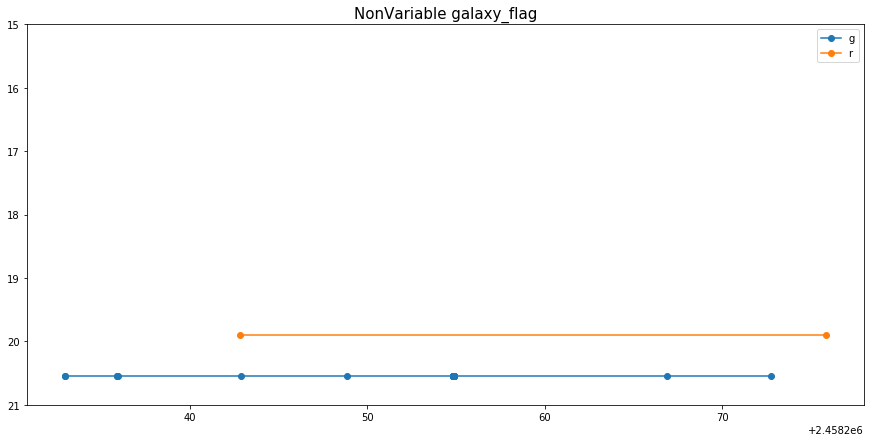

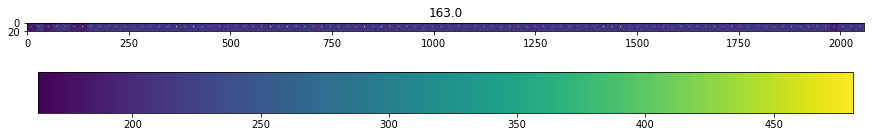

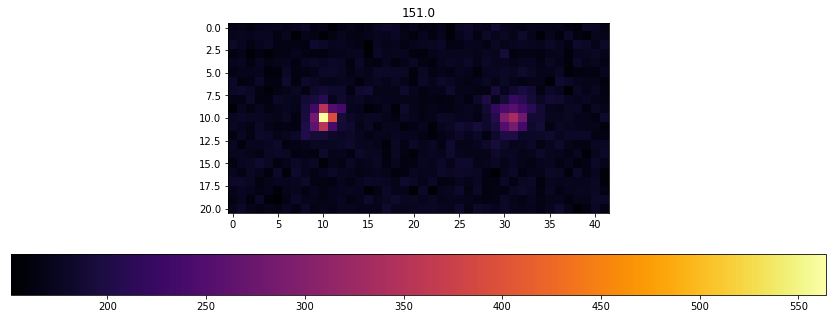

['count_lightcurves', 'estimated_counts', 'estimated_error_counts', 'galaxy_flag', 'galaxy_image', 'ids', 'images', 'labels', 'lc_type', 'lightcurves', 'obs_cond', 'psf_image']
g: (60, 21, 21, 4) r: (60, 21, 21, 20)
g: (60, 4) r: (60, 20)
[208.1373  208.03398 208.0395  224.11058 221.1571  203.60284 224.50003
 224.51776 203.63606 207.87093 224.63013 208.0363  224.39812 224.31033
 223.56625 224.14326 208.02795 224.3869  207.89148 224.64323]


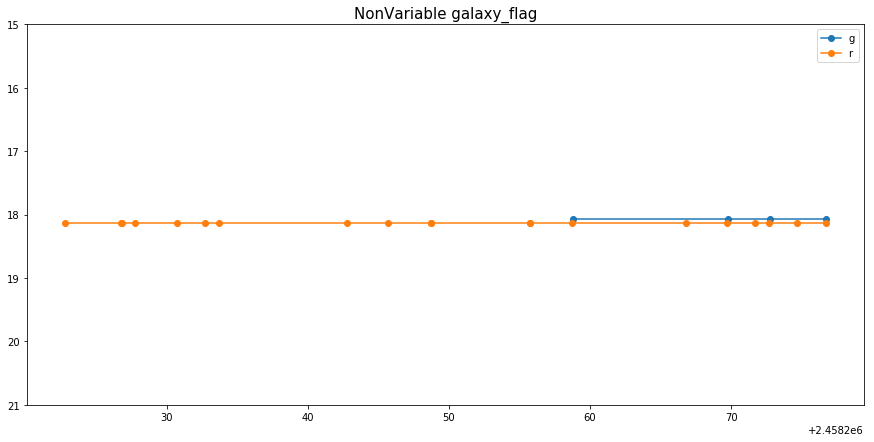

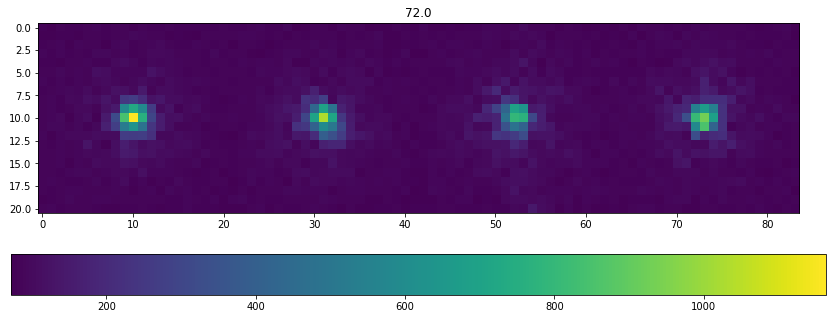

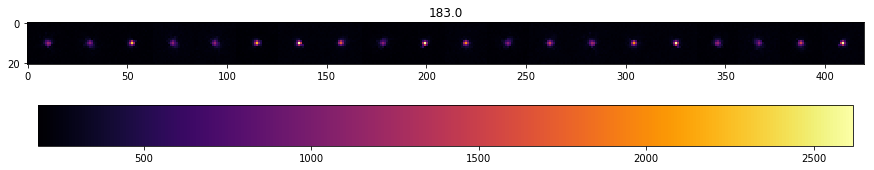

['count_lightcurves', 'estimated_counts', 'estimated_error_counts', 'galaxy_flag', 'galaxy_image', 'ids', 'images', 'labels', 'lc_type', 'lightcurves', 'obs_cond', 'psf_image']
g: (60, 21, 21, 22) r: (60, 21, 21, 19)
g: (60, 22) r: (60, 19)
[210.952   210.91013 216.33398 211.2897  235.70828 235.82458 211.17955
 216.46698 235.76471 210.74402 216.40837 234.63219 210.63005 216.46756
 235.72789 210.40189 216.31854 235.69534 211.39009]


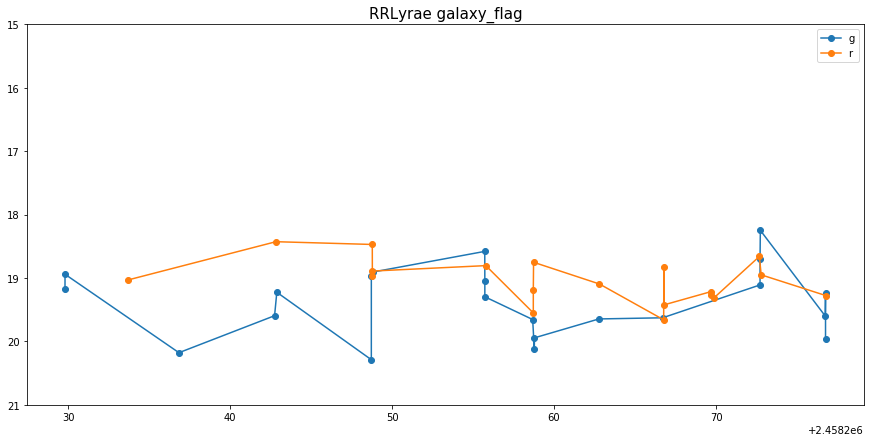

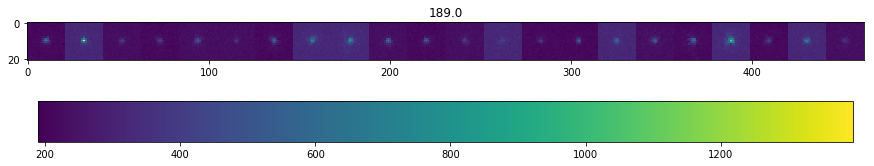

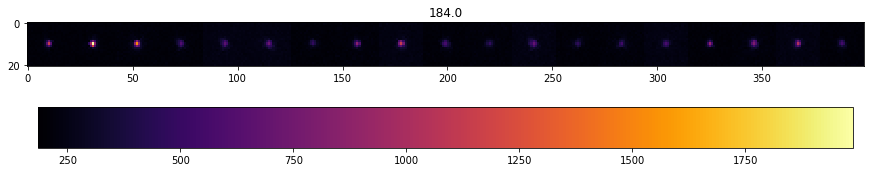

['count_lightcurves', 'estimated_counts', 'estimated_error_counts', 'galaxy_flag', 'galaxy_image', 'ids', 'images', 'labels', 'lc_type', 'lightcurves', 'obs_cond', 'psf_image']
g: (60, 21, 21, 94) r: (60, 21, 21, 5)
g: (60, 94) r: (60, 5)
[168.02678 167.986   168.0893  168.1269  168.02448]


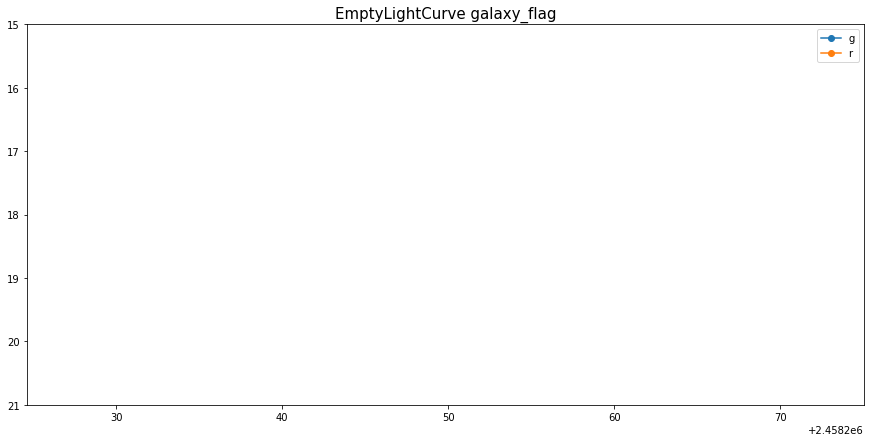

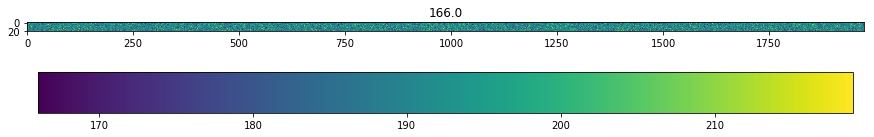

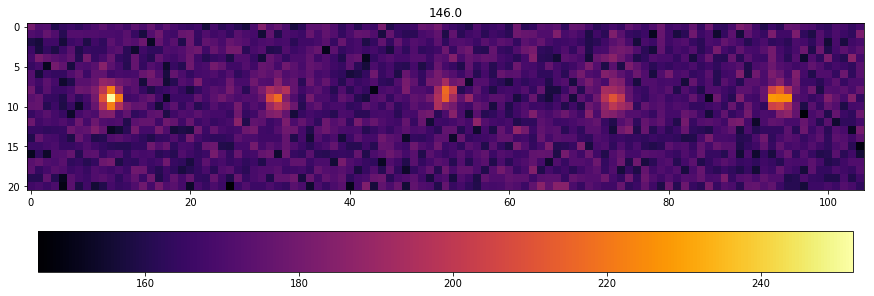

['count_lightcurves', 'estimated_counts', 'estimated_error_counts', 'galaxy_flag', 'galaxy_image', 'ids', 'images', 'labels', 'lc_type', 'lightcurves', 'obs_cond', 'psf_image']
g: (60, 21, 21, 10) r: (60, 21, 21, 10)
g: (60, 10) r: (60, 10)
[224.03055 224.02168 224.042   223.99136 223.90125 224.13176 224.00594
 224.3214  223.51749 223.89307]


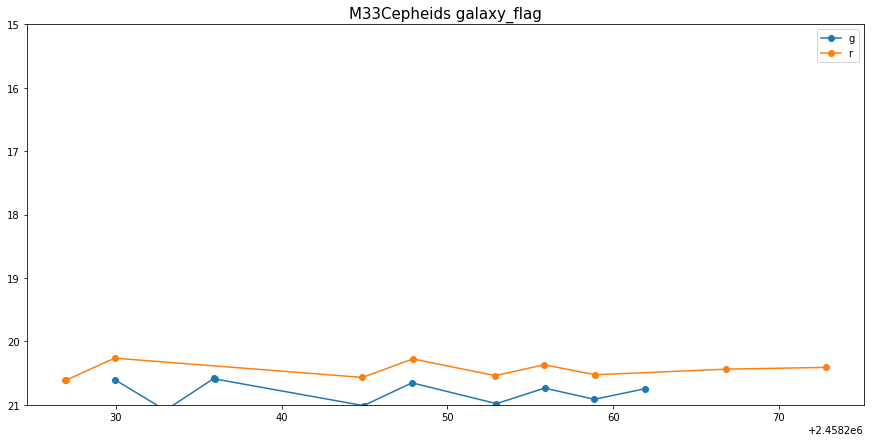

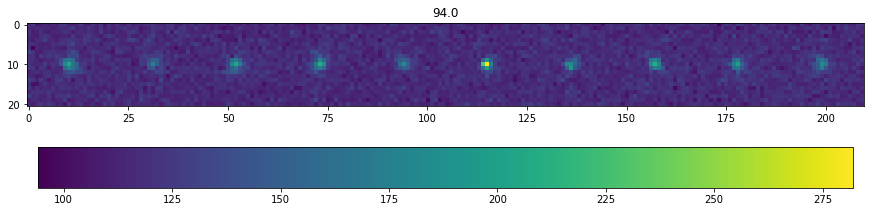

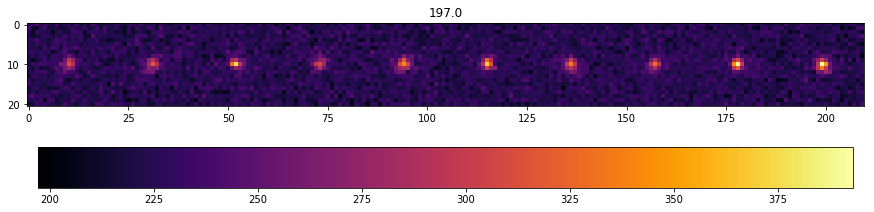

['count_lightcurves', 'estimated_counts', 'estimated_error_counts', 'galaxy_flag', 'galaxy_image', 'ids', 'images', 'labels', 'lc_type', 'lightcurves', 'obs_cond', 'psf_image']
g: (60, 21, 21, 87) r: (60, 21, 21, 2)
g: (60, 87) r: (60, 2)
[151.87144 151.78528]


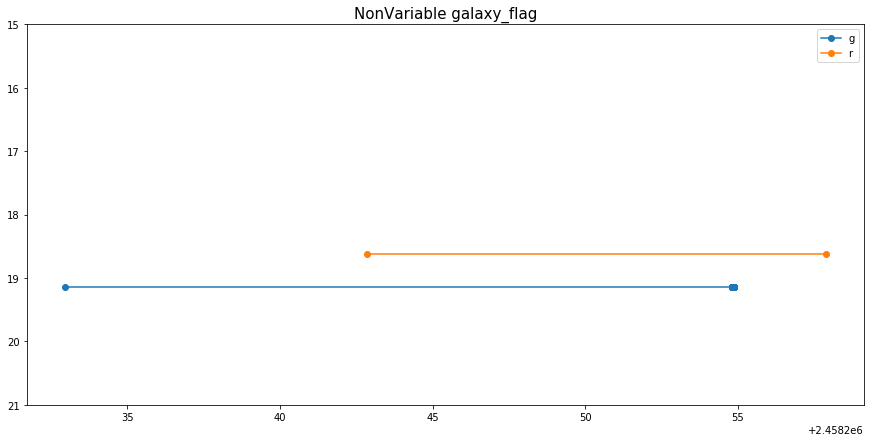

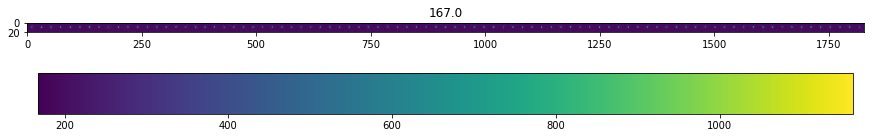

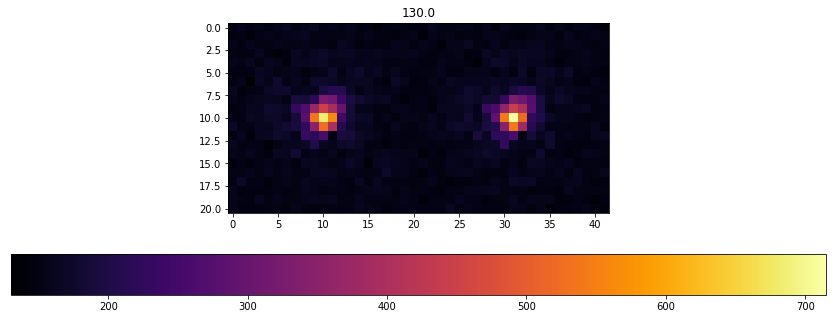

['count_lightcurves', 'estimated_counts', 'estimated_error_counts', 'galaxy_flag', 'galaxy_image', 'ids', 'images', 'labels', 'lc_type', 'lightcurves', 'obs_cond', 'psf_image']
g: (60, 21, 21, 8) r: (60, 21, 21, 13)
g: (60, 8) r: (60, 13)
[202.55403 203.13106 158.304   203.00378 202.95795 158.30766 158.4721
 203.00395 202.78775 201.53018 158.45204 202.8704  203.05908]


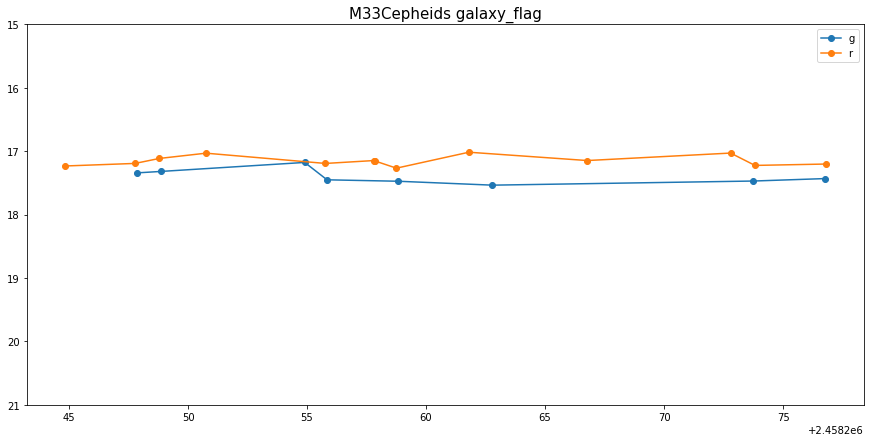

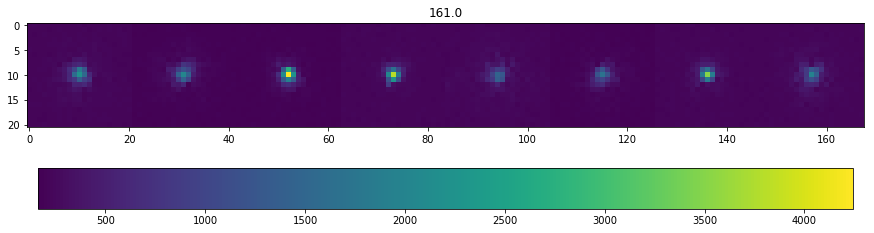

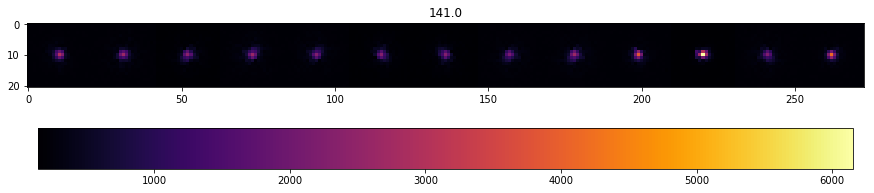

['count_lightcurves', 'estimated_counts', 'estimated_error_counts', 'galaxy_flag', 'galaxy_image', 'ids', 'images', 'labels', 'lc_type', 'lightcurves', 'obs_cond', 'psf_image']
g: (60, 21, 21, 17) r: (60, 21, 21, 15)
g: (60, 17) r: (60, 15)
[277.70856 277.9187  279.22714 278.8441  278.5239  279.26083 304.06308
 278.99304 278.12125 279.49738 279.39093 278.6699  277.6441  278.14536
 277.8465 ]


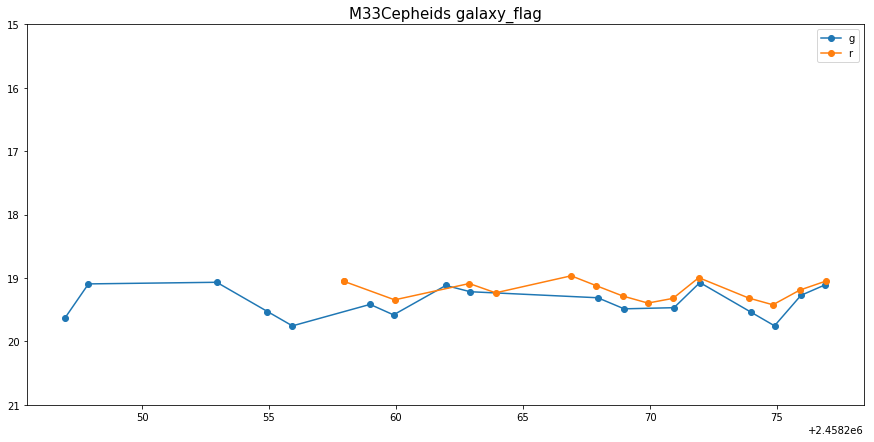

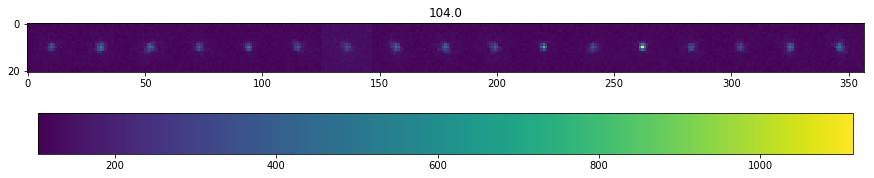

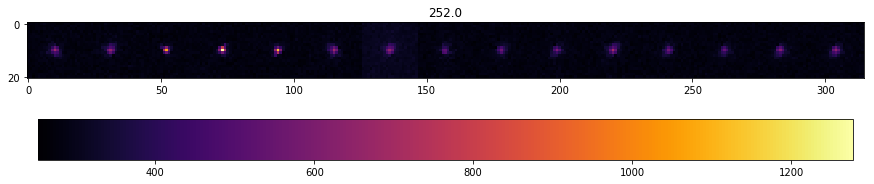

['count_lightcurves', 'estimated_counts', 'estimated_error_counts', 'galaxy_flag', 'galaxy_image', 'ids', 'images', 'labels', 'lc_type', 'lightcurves', 'obs_cond', 'psf_image']
g: (60, 21, 21, 14) r: (60, 21, 21, 7)
g: (60, 14) r: (60, 7)
[294.039   294.80795 294.90683 294.551   294.34158 186.11531 186.09286]


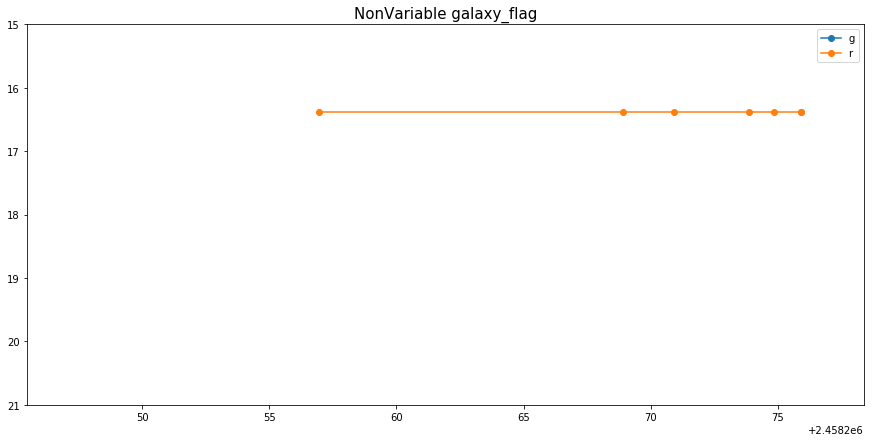

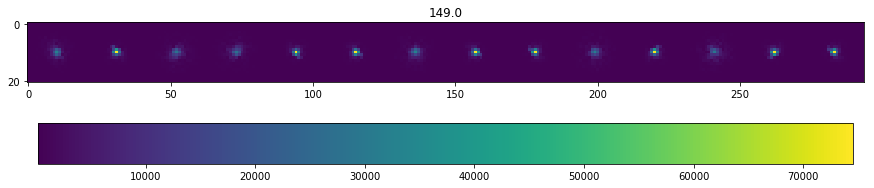

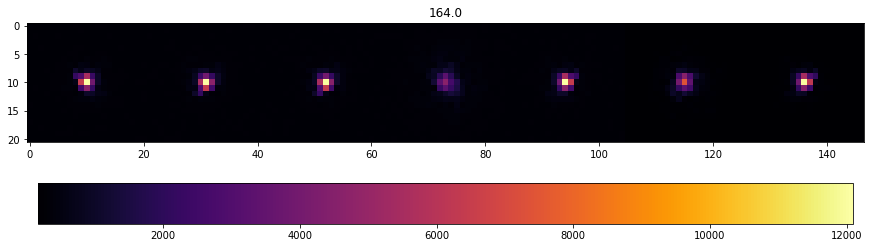

['count_lightcurves', 'estimated_counts', 'estimated_error_counts', 'galaxy_flag', 'galaxy_image', 'ids', 'images', 'labels', 'lc_type', 'lightcurves', 'obs_cond', 'psf_image']
g: (60, 21, 21, 15) r: (60, 21, 21, 10)
g: (60, 15) r: (60, 10)
[242.05974 286.06158 286.1049  241.95972 241.56502 240.91942 286.30643
 286.28085 241.56686 242.62547]


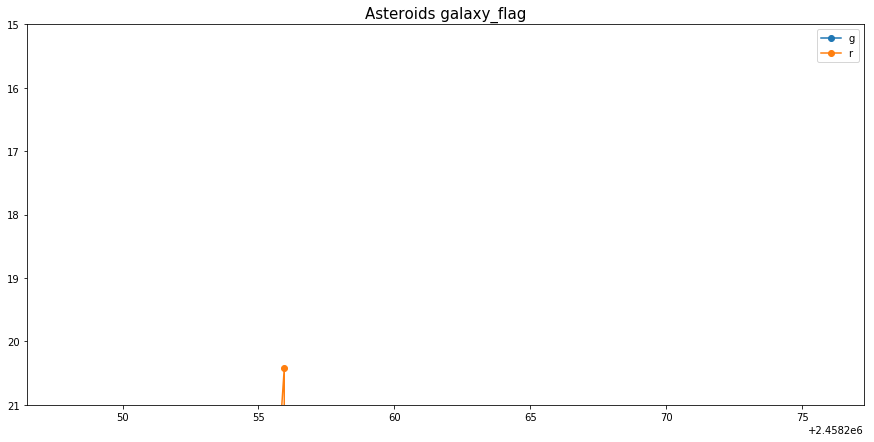

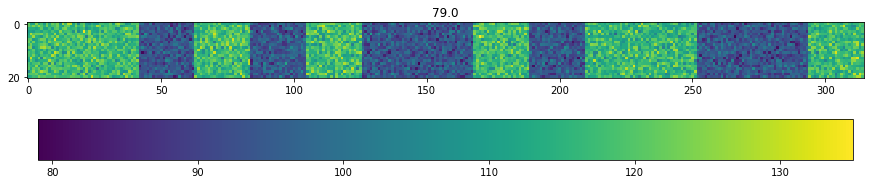

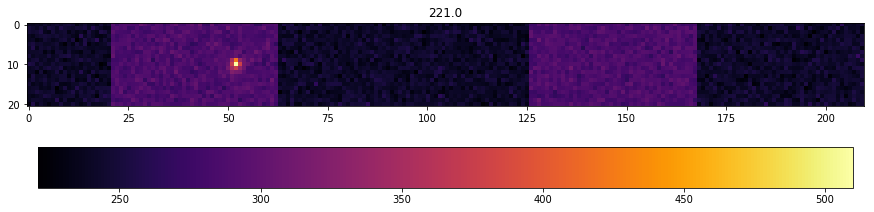

['count_lightcurves', 'estimated_counts', 'estimated_error_counts', 'galaxy_flag', 'galaxy_image', 'ids', 'images', 'labels', 'lc_type', 'lightcurves', 'obs_cond', 'psf_image']
g: (60, 21, 21, 24) r: (60, 21, 21, 1)
g: (60, 24) r: (60, 1)
[232.99545]


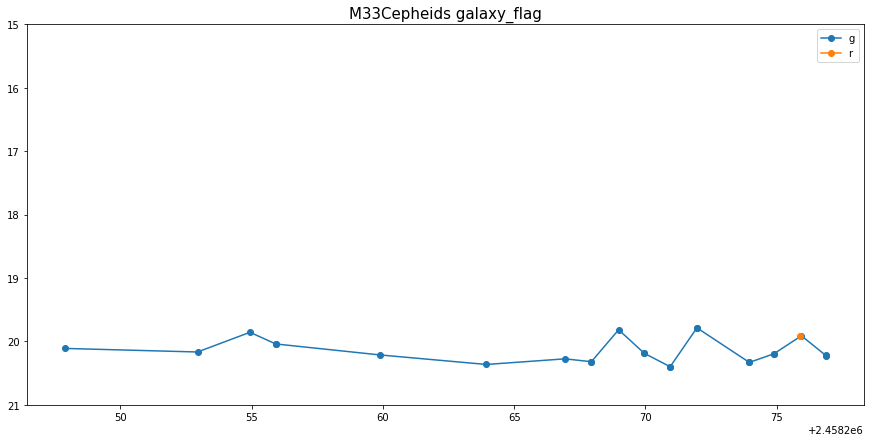

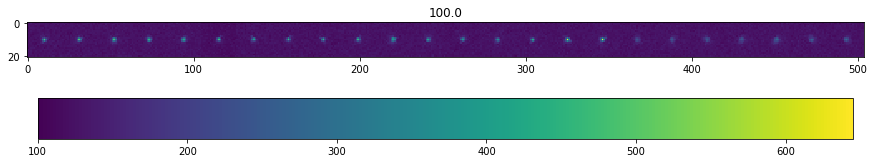

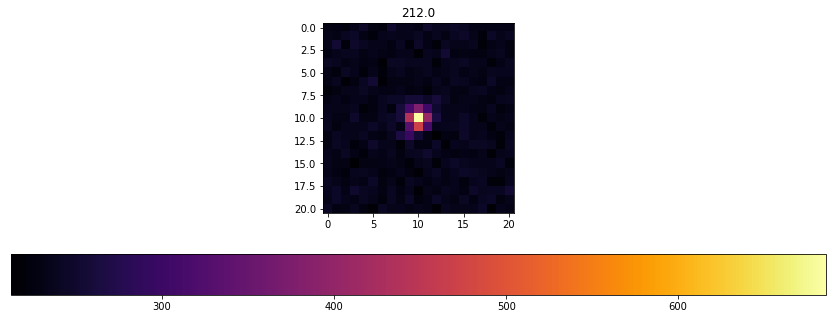

['count_lightcurves', 'estimated_counts', 'estimated_error_counts', 'galaxy_flag', 'galaxy_image', 'ids', 'images', 'labels', 'lc_type', 'lightcurves', 'obs_cond', 'psf_image']
g: (60, 21, 21, 14) r: (60, 21, 21, 12)
g: (60, 14) r: (60, 12)
[251.88396 222.49445 251.9355  222.51624 251.88654 251.8511  221.8162
 222.42984 251.90373 222.41162 251.77751 222.61952]


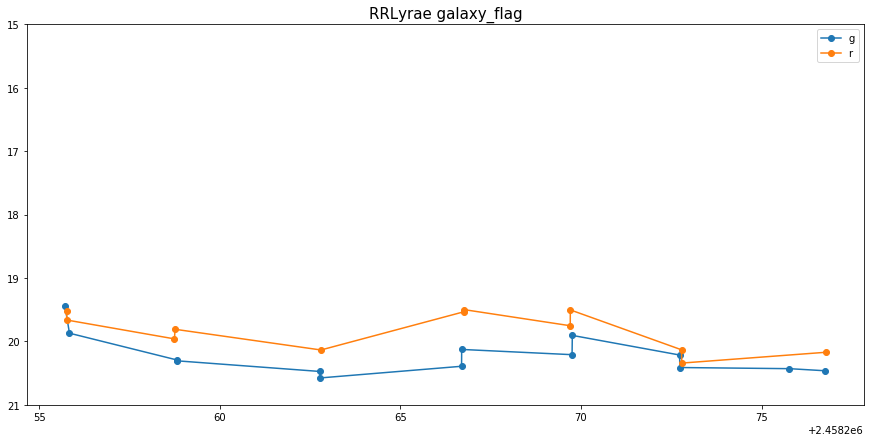

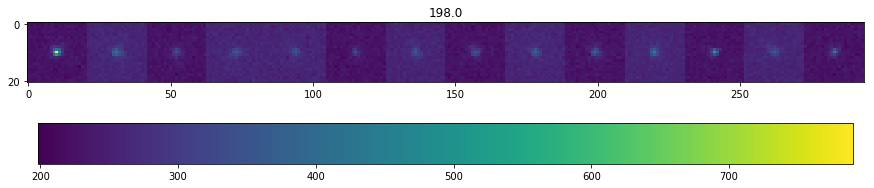

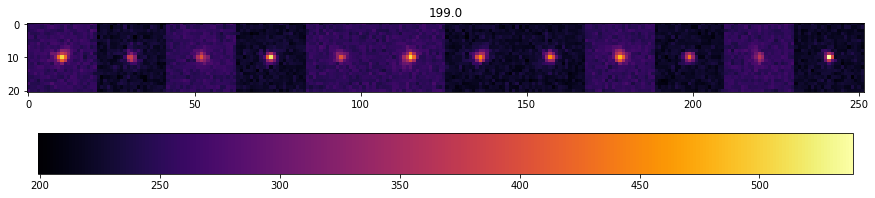

['count_lightcurves', 'estimated_counts', 'estimated_error_counts', 'galaxy_flag', 'galaxy_image', 'ids', 'images', 'labels', 'lc_type', 'lightcurves', 'obs_cond', 'psf_image']
g: (60, 21, 21, 14) r: (60, 21, 21, 11)
g: (60, 14) r: (60, 11)
[179.13025 178.79419 310.04184 309.74796 178.42418 178.46158 178.59325
 310.38785 179.25893 309.98233 310.10886]


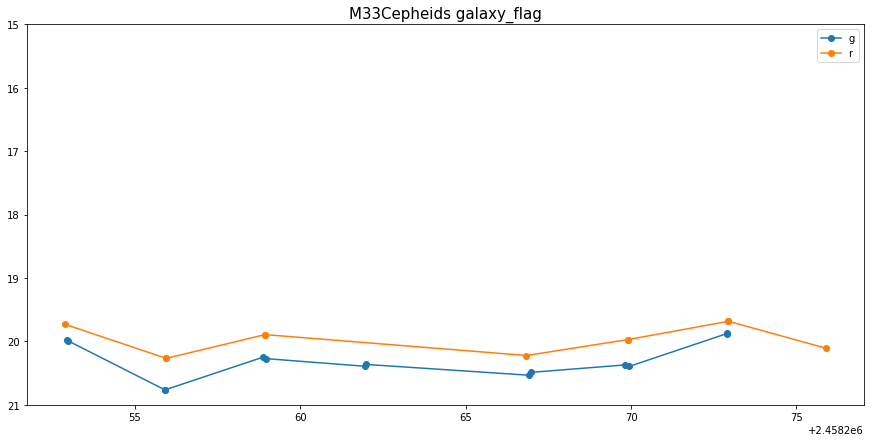

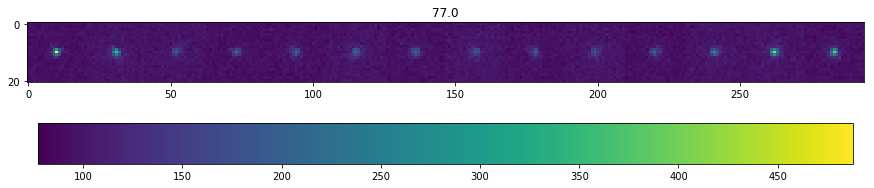

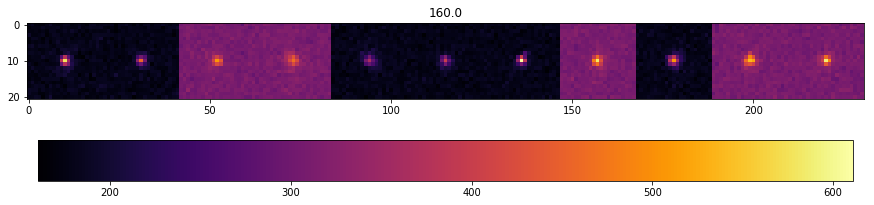

['count_lightcurves', 'estimated_counts', 'estimated_error_counts', 'galaxy_flag', 'galaxy_image', 'ids', 'images', 'labels', 'lc_type', 'lightcurves', 'obs_cond', 'psf_image']
g: (60, 21, 21, 27) r: (60, 21, 21, 16)
g: (60, 27) r: (60, 16)
[296.6732  296.73193 296.47165 296.5877  296.36438 297.71362 297.81772
 302.61798 297.63535 296.81046 298.22806 297.81058 297.08783 297.06308
 296.4089  296.90463]


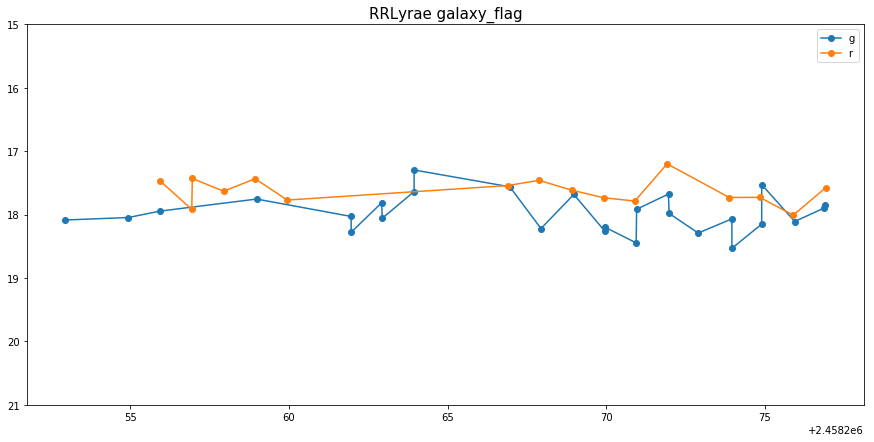

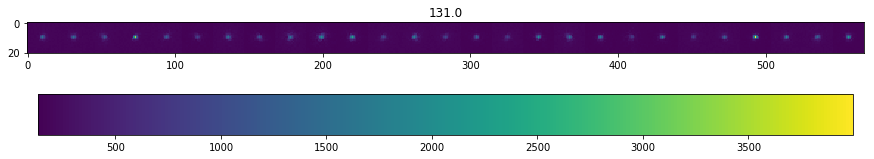

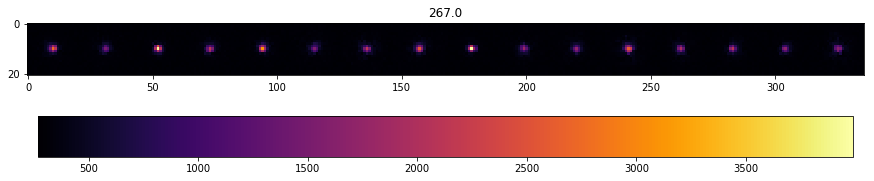

['count_lightcurves', 'estimated_counts', 'estimated_error_counts', 'galaxy_flag', 'galaxy_image', 'ids', 'images', 'labels', 'lc_type', 'lightcurves', 'obs_cond', 'psf_image']
g: (60, 21, 21, 15) r: (60, 21, 21, 8)
g: (60, 15) r: (60, 8)
[176.31895 177.72433 177.14813 178.22185 177.71005 177.04543 177.48357
 176.79196]


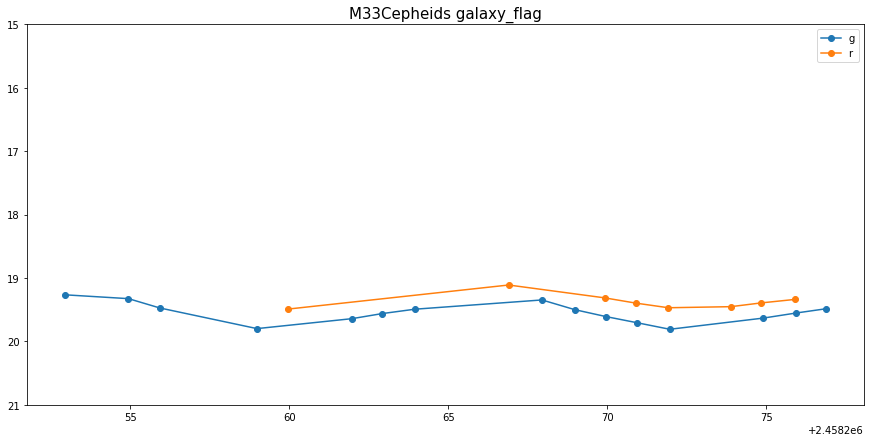

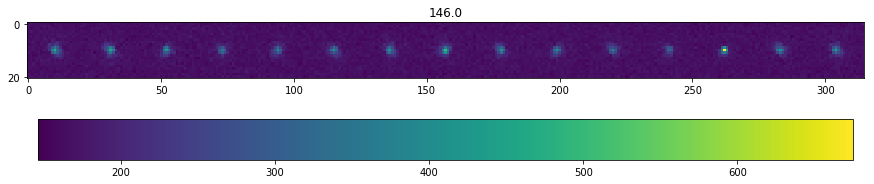

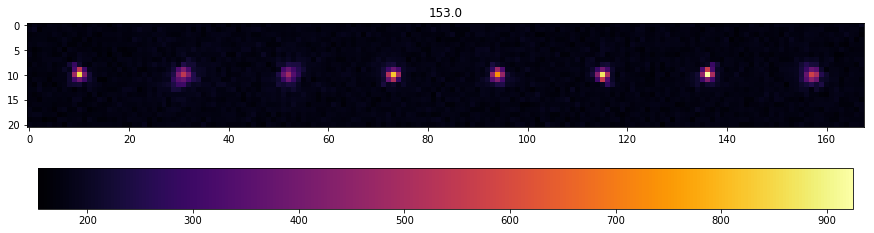

['count_lightcurves', 'estimated_counts', 'estimated_error_counts', 'galaxy_flag', 'galaxy_image', 'ids', 'images', 'labels', 'lc_type', 'lightcurves', 'obs_cond', 'psf_image']
g: (60, 21, 21, 3) r: (60, 21, 21, 23)
g: (60, 3) r: (60, 23)
[294.7136  294.28137 294.57724 294.47745 294.16623 195.47221 294.3428
 194.94096 195.48029 294.17593 294.46646 195.3723  195.07854 293.3617
 294.54852 294.90585 195.93782 294.5536  195.67523 295.2339  195.4439
 294.77316 294.5044 ]


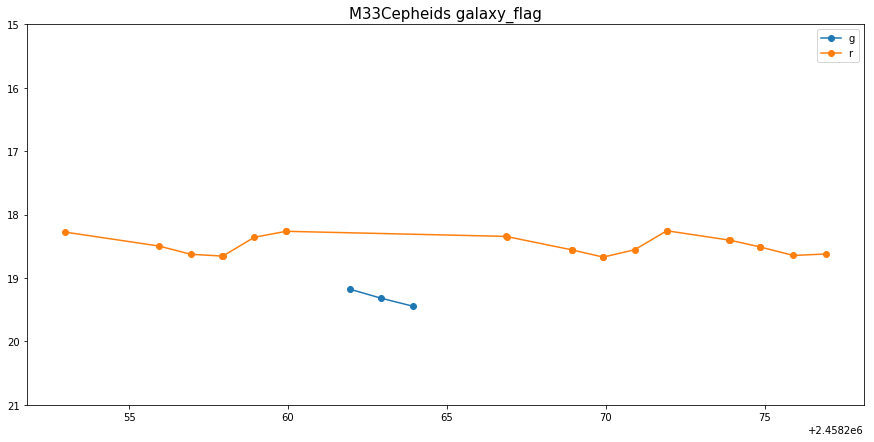

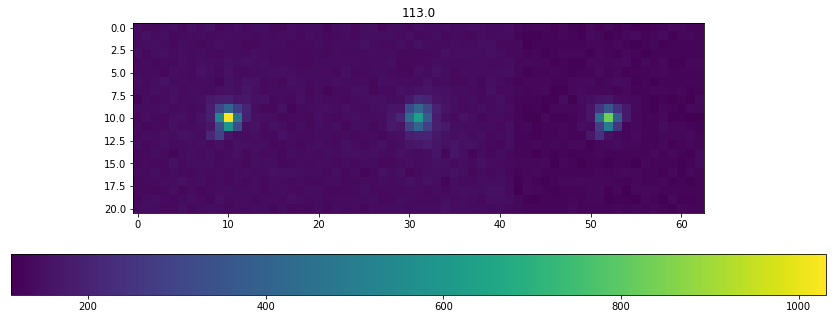

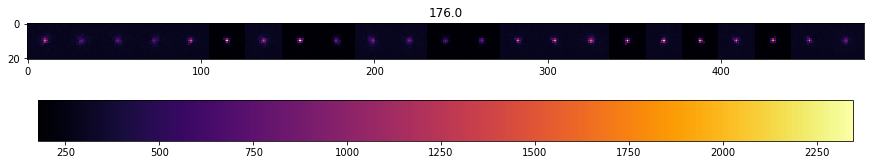

['count_lightcurves', 'estimated_counts', 'estimated_error_counts', 'galaxy_flag', 'galaxy_image', 'ids', 'images', 'labels', 'lc_type', 'lightcurves', 'obs_cond', 'psf_image']
g: (60, 21, 21, 11) r: (60, 21, 21, 15)
g: (60, 11) r: (60, 15)
[287.30222 287.31238 287.18903 287.48813 287.30286 287.59183 287.61166
 244.49042 289.10318 289.96133 289.3503  288.2228  288.15485 287.89264
 287.463  ]


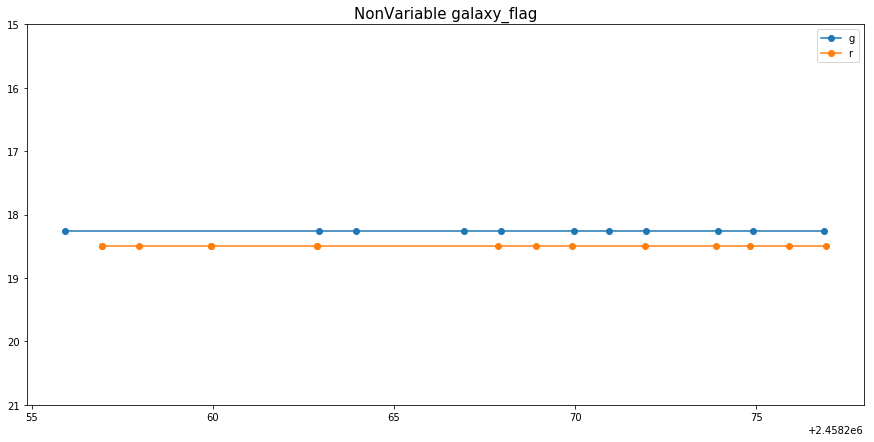

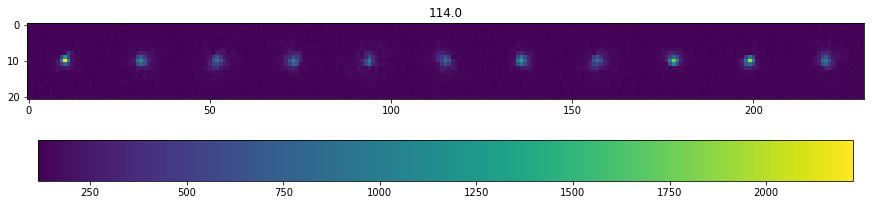

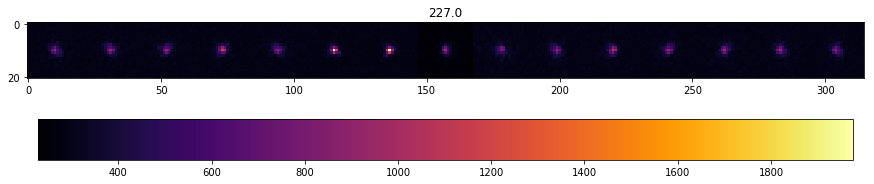

['count_lightcurves', 'estimated_counts', 'estimated_error_counts', 'galaxy_flag', 'galaxy_image', 'ids', 'images', 'labels', 'lc_type', 'lightcurves', 'obs_cond', 'psf_image']
g: (60, 21, 21, 12) r: (60, 21, 21, 10)
g: (60, 12) r: (60, 10)
[230.37125 220.02917 230.71405 230.87558 230.20546 230.23135 230.19606
 230.00243 229.61852 229.54626]


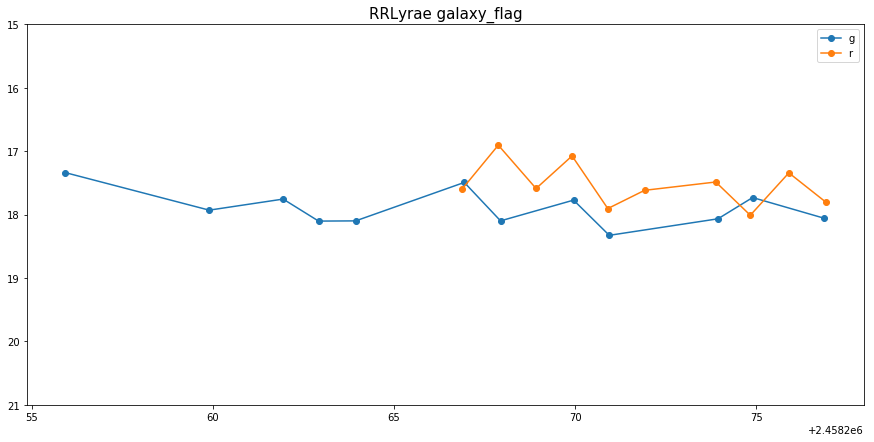

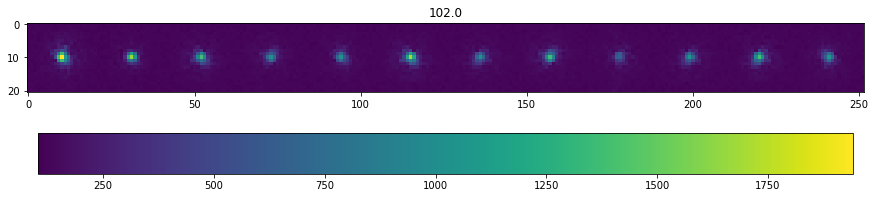

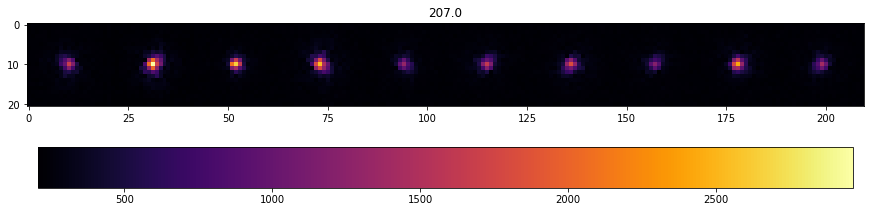

In [5]:
bands = ["g", "r"]
n_per_field = 3
for field in fields:
    field_data = f[field]
    print(list(field_data))
    field_images = field_data["images"]
    print("g:", field_images["g"].shape, "r:", field_images["r"].shape)
    field_lc = field_data["lightcurves"]
    print("g:", field_lc["g"].shape, "r:", field_lc["r"].shape)
    days = field_data["obs_cond"]["obs_day"]
    print(field_data["obs_cond"]["sky_brightness"]["r"][:])
    lc_type = field_data["lc_type"][0]
    plt.figure(figsize=(15, 7))
    for band in bands:
        plt.plot(days[band], field_lc[band][0, ...], "o-", label=band)
    galaxy_flag = field_data["galaxy_flag"][0]
    plt.title(lc_type+" galaxy_flag", fontsize=15)
    plt.ylim([21, 15])
    plt.legend()
    plt.show()
    for band in bands:
        plt.figure(figsize=(15,5))
        n_images = field_lc[band].shape[1]
        empty_image = np.zeros((21, 21*n_images,))
        for i in range(n_images):
            empty_image[:, i*21:(i+1)*21] = field_images[band][0, :, :, i]
        if band == "g":
            c_map = "viridis"
        else:
            c_map = "inferno"
        plt.imshow(empty_image, cmap=c_map)
        plt.title(np.amin(empty_image))
        plt.colorbar(orientation="horizontal")
        plt.show()